# w261 Final Project - Team 2: Clickthrough Rate Prediction

<img src="images/Berkeley Criteo.png" style="width: 600px;" align="left">

#### Danielle Adler, Craig Fujii, Conor Healy, YoungKoung Kim

#### Fall 2019, Section 1 (Danielle and Craig), 2 (Conor), 4 (YoungKoung)

<br>

## Table of Contents

* __Section 1__ - Question Formulation
* __Section 2__ - Algorithm Explanation
* __Section 3__ - Exploratory Data Analysis & Challenges
* __Section 4__ - Algorithm Implementation
* __Section 5__ - Course Concepts

<br>

# __Section 1__ - Question Formulation

**<font color='red'>
    1. Question Formulation -- Introduce the goal of your analysis. What questions will you seek to answer, why do people perform this kind of analysis on this kind of data? Preview what level of performance your model would need to achieve to be practically useful.
</font>**

Click-through rate (CTR) is a measure of how often users click on a specific link among those who view a page, email, or advertisement. Accuracy of a CTR prediction is very important for organizations that need to understand online user behavior. For example, these predictions can be used in online advertising to target customers. If companies had an accurate idea of customer performance, they could increase the likelihood of online products being viewed and purchased. Large amounts of CTR data created by millions of web users’ daily activities, lead to challenges in implementing machine learning algorithms that can efficiently provide meaningful insights on the data.

The primary goal of our project is to build binary classification models to predict CTR by implementing two popular machine learning algorithms for binary classifications - logistic regression and decision trees. The specific research questions are:

*   Which machine learning algorithm produce the best predictions of CTR?
*   What metric(s) should we consider when we are defining "best" predictions of CTR?
*   How can we implement scalable machine learning algorithms that efficiently handle a large amount of data?

To answer these questions, we analyzed the CTR for the [Criteo Advertising Data](https://www.kaggle.com/c/criteo-display-ad-challenge/data). The data includes a target variable that indicates if an ad was clicked (1) or not clicked (0), 13 integer features and 26 categorical features. The detailed description of the data, the treatment of the missing values, and the transformations of categorical features, and the machine learning models themselves are presented below. We compare the model performance based on the classification evaluation metrics:

*   Accuracy = $\frac{True Positives + True Negatives}{True Positives + True Negatives + False Positive + Negatives}$ <br>

*   Precision = $\frac{True Positives}{True Positives + False Positive}$ <br>

*   Recall = $\frac{True Positives}{True Posititves + False Negatives}$ <br>

*   F1 score = $2\cdot\frac{Precision\cdot Recall}{Precision + Recall}$ <br>

We have decided to focus on F1 score as our primary measure of success. Accuracy, which is simply the proportion of observations predicted correctly over total observations, is not the best measure. Accuracy assigns equal weight to false positives and false negatives. When the dataset is balanced, that can work very well. However, as we will show in the EDA section below, our dataset is not well balanced. Far more users do not click when given the opportunity than do click. Therefore, we would still have mediocre accuracy if all observations were predicted on the not clicked class (0).

We favored the F1 score because it takes precision (ratio of the true positives to true and false positives) and recall (ratio of the true positives to true positives and false negatives) into account. Therefore, the F1 score is essentially taking both false positives and false negatives into account without needing to weight them equally. This type of scoring system to evaluate predictive performance works best when classes are not balanced, which is the case with our data. We will be comparing our logistic regression and decision tree models to three baseline models which create a random 50/50 prediction, a weighted 75/25 random prediction, or predicts everything to the majority class. Our goal will be to have higher F1 scores than the baseline model(s).

Although the two models that we focus on for our project are very often used for binary classification problems, we expect our study to have clear limitations. Studies found that ensemble learning models that combine these models perform better for predicting this type of binary classification. If we had more time, we would like to explore combining the decision tree and logistic regression algorithms as this may improve prediction. As we discussed when choosing the F1 score, the desired action is a relatively rare event and thus results in unbalanced data, which may affect our prediction. Balancing our CTR class variable would be something that we would like to pursue in future analysis.

**Resources Referenced:**
*   [Towards Data Science: Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
*   [Towards Data Science: Beyond Accuracy: Precision and Recall](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)
*   [Machine Learning Mastery: How to Calculate Precision, Recall, F1, and More for Deep Learning Models](https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/)

<br>
<br>

# __Section 2__ - Algorithm Explanation

**<font color='red'>
2. Algorithm Explanation -- Create your own toy example that matches the dataset provided and use this toy example to explain the math behind the algorithm that you will perform.
</font>**

We used two different machine learning algorithms to attempt our predictions of CTR on the dataset: logistic regression and decision trees. We have described both below:

## Toy Dataset Transformations

In order to explain our process, we will start with a dataset that includes our result, two numeric variables, and one categorical variable.  In our real dataset, the categorical variables are masked by hashed values, and we have far more features. The overall process is the same though.

| example # | result | numeric1 | numeric2 | categorical1 |
|-----------|--------|----------|----------|--------------|
| 1         | 0      | 1.0      | 2        | apple        |
| 2         | 0      | 2.0      | 2        | apple        |
| 3         | 1      | 1.0      | 4        | banana       |
| 4         | 1      | 1.0      | 13       | apple        |


### Transformation of Categorical Variables

To transform the categorical variables into a format usable in logistic regression, we both "binned" and "one-hot encoded" the categorical variables. We performed other transformations too such as taking the weighted average of the dependent variable (i.e. CTR) for each value within the categorical variables and then imputing these values as the categorical values themselves. This method essentially turned the categorical variables into numeric variables, which resulted in a bit of overfitting on the toy dataset and a slightly better performance on the full dataset. The dataset that we felt most confident in across our two machine learning algorithms included binning and one-hot ending, and we will discuss those further below.


#### Binning of Encoded Categorical Variables

For both scale and performance reasons, we "binned" our categorical variables: we grouped the values (distinct categories) within each categorical variable based on rules we chose. This reduced the number of unique categories in each variable, which reduced the number of new columns created in the next step of one-hot encoding. In future enhancements of our model, we would update our grouping rule to attempt to address overfitting; we could calculate the confidence in the generalizability of each unique value in each category, and group the less generalizable values into the same "other" bin as unseen observations from our test data.

For each categorical variable, we: 

1. Identified the Distinct Values:

| categorical1 |
|--------------|
| apple        |
| banana       |


2. Calculated the _proportion_ of class "1" vs. "0" results:

| categorical1 | 1 | 0 | proportion |
|--------------|---|---|------------|
| apple        | 1 | 2 | 1/3        |
| banana       | 1 | 0 | 1/1        |


3. Applied our binning rule (in this case, _proportion_ > 0.6 = "High", _proportion_ > 0.1 = "Medium",  _proportion_ <= 0.1 = "Low", _null values_ = "Other"):

| categorical1 | 1 | 0 | proportion | binned value |
|--------------|---|---|------------|--------------|
| apple        | 1 | 2 | 1/3        | Low          |
| banana       | 1 | 0 |   1        | High         |


4. Updated the values in the categorical variable according to our _binned value_:

| example # | result | numeric1 | numeric2 | categorical1 |
|-----------|--------|----------|----------|--------------|
| 1         | 0      | 1.0      | 2        | Low          |
| 2         | 0      | 2.0      | 2        | Low          |
| 3         | 1      | 1.0      | 4        | High         |
| 4         | 1      | 1.0      | 13       | Low          |


#### One-Hot Encoding of Binned Categorical Variables

Logistic regression among many machine learning algorithms needs the variables in a numeric format, so we "one-hot encode" the categorical variables: we replace the binned categorical variables with a series of new variables where, for each unique value in the original variable, we create a new column to represent that value (_categorical1A_ represents "High", _categorical1B_ represents "Medium", etc.), and code each row "1" if the value in the original variable matched the value that the new variable represents and "0" otherwise. 


| example # | result | numeric1 | numeric2 | categorical1A | categorical1B |
|-----------|--------|----------|----------|---------------|---------------|
| 1         | 0      | 1.0      | 2        | 1             | 0             | 
| 2         | 0      | 2.0      | 2        | 1             | 0             | 
| 3         | 1      | 1.0      | 4        | 0             | 1             | 
| 4         | 1      | 1.0      | 13       | 1             | 0             | 


### Log Transforming and Scaling Numeric Variables

We performed EDA and saw that many of our numerical distributions were heavily right-skewed with long tails showing that the numeric variables were not normally distributed. When we took the log transformations (shown in histograms below), the distributions were much better for all variables. Therefore, we first took the natural log transformation of all variables. To keep variables with larger values from overpowering the model, we also scaled the numeric variables to a range between 0 and 1 with a `MinMaxScaler`: 

$$\textrm{scaled_value} = \dfrac{value - min}{max - min}$$

where _min_ and _max_ are the minimum and maximum values for the variable.

| example # | result | numeric1 | numeric2 | categorical1A | categorical1B |
|-----------|--------|----------|----------|---------------|---------------|
| 1         | 0      | $$\frac{1 - 1}{2 - 1} = 0$$ | $$\frac{2 - 2}{13 - 2} = 0$$ | 1             | 0             | 
| 2         | 0      | $$\frac{2 - 1}{2 - 1} = 1$$ | $$\frac{2 - 2}{13 - 2} = 0$$ | 1             | 0             | 
| 3         | 1      | $$\frac{1 - 1}{2 - 1} = 0$$ | $$\dfrac{4 - 2}{13 - 2} = \dfrac{2}{11}$$ | 0             | 1             | 
| 4         | 1      | $$\frac{1 - 1}{2 - 1} = 0$$ | $$\frac{13 - 2}{13 - 2} = 1$$ | 1             | 0             | 


### Imputing

To take step 3 of the `binning of encoded categorical variables` section listed above a bit further, we explored three transformations of our binning and encoding of categorical variables for the null values. Our first transformation included only two binned values: a low and a high value. "High" was listed as the category if the proportion was greater than 0.2. Otherwise the "low" was listed (and "low" was listed for null values as well). Our second transformation included four binned values with the explicit thresholds listed in step 3 of the `binning of encoded categorical variables` section. Our third transformation included leaving the proportion as it stood and essentially converting the categorical variables to numeric variables. The mean of the proportion was imputed for all null values within each categorical variable. In this third transformation, one-hot encoding was not done as the categorical variables were converted to numeric variables as opposed to binned.

For the numeric variables, after the natural log transformation and the scaling of the numeric variables, two different imputing transformations were done. First, the mean of each numeric variable was imputed for all null values. Second, zero was imputed for the null values. All transformations (categorical and numeric) are listed below and were tested within the logistic regression and decision tree algorithms.

<br>

## Logistic Regression Algorithm Explanation

_Logistic regression_ is a method to calculate the probability of a binary result (where the values are 1s or 0s) given some initial values.  We calculate logistic regression in terms of "odds": the probability that a particular outcome is a success divided by the probability that it is a failure.  In this case, we are using _binomial logistic regression with multiple explanatory variables_ to take the values of the various of _variables_ (often also called _columns_ or _features_) from our dataset about advertisements to predict the odds that the user will "click through" on an ad (0 = "no click" = "failure", 1 = "click" = "success"). 

Mathematically:

$p(x) = \sigma(t)= \dfrac {1}{1+e^{-(\beta_0 + \sum_{i=1}^m \beta_i x_i)}}$ where $t = \beta_0 + \beta_1 x$

and the log odds:

$\textrm{logit} p(x) = \ln \left( \frac{p(x)}{1 - p(x)} \right) = \beta_0 + \sum_{i=1}^m \beta_i x_i$ and $\dfrac{p(x)}{1 - p(x)} = e^{(\beta_0 + \sum_{i=1}^m \beta_i x_i)}$


### Stochastic gradient descent:

We use gradient descent (assumed this was the type of gradient descent used in our Logistic Regression ml models), where we start at some initial coefficients and calculate initial predictions, then use the errors in those predictions and a learning rate ($\alpha$) to calculate new coefficients, and repeat until the errors are small enough (according to a pre-defined convergence criteria) or we reach a pre-defined maximum number of iterations. In particular, we use stochastic gradient descent, where rather than update the coefficients based on prediction errors for all records, we randomly sort the records and then iterate through the records, updating the coefficients with each record.

We update the coefficients using the formula:

$$ \beta'_i = \beta_i + \alpha \times (y - prediction) \times prediction \times (1 - prediction) \times x $$

Where $\beta'_i$ is the updated coefficient, $\beta_i$ is the existing value for the coefficient being updated, $\alpha$ is the learning_rate, $(y – prediction)$ is the prediction error, $prediction$ is the $p(success)$ prediction for the record, and $x$ is the value of the variable corresponding to $\beta_i$ for the current record.


### Formulas for calculating logistic regression with our toy dataset:

$$\textrm{logit} p(x) = t = \beta_0 + \sum_{i=1}^m \beta_i x_i = \beta_0 + \beta_1 numeric1 + \beta_2 numeric2 + \beta_3 categorical1A + \beta_4 categorical1B$$

so

$$p(success) = \dfrac {1}{1+e^{-(t)}} = \dfrac {1}{1+e^{-(\beta_0 + \beta_1 numeric1 + \beta_2 numeric2 + \beta_3 categorical1A + \beta_4 categorical1B)}}$$


### Calculating logistic regression with our toy dataset:

For this toy dataset, we will start with initial coefficients $\beta_0 = \beta_1 = \beta_2 = \beta_3 = \beta_4 = 1$ and $\alpha = 0.5$

For each epoch iterating through all examples, the algorithm randomizes the order of the records. To keep this explanation simple, we will assume that we got "lucky" and the $\frac{1}{4!}$ = 1 in 24 chance happened: our ordering in our first epoch is 1, 2, 3, 4:

| example # | y | $t = \beta_0 + \sum_{i=1}^m \beta_i x_i$ | $p(success) = \dfrac {1}{1+e^{-(t)}}$ | $\alpha \times (y - prediction) \times prediction \times (1 - prediction)$ | $\beta'_0$ | $\beta'_1$ | $\beta'_2$ | $\beta'_3$ | $\beta'_4$
|-----------|---|-----------------------------------------------------------------------|------------|-|-|-|-|-|-|
| 1 | 0 | $1 + (1 \times 0) + (1 \times 0) + (1 \times 1) + (1 \times 0) = 2$ | 0.88 | -0.05 | 0.95 | 1 | 1 | 0.95 | 1 | 
| 2 | 0 | $0.95 + (1 \times 1) + (1 \times 0) + (0.95 \times 1) + (1 \times 0) = 2.91$ | 0.95 | -0.02 | 0.93 | 0.98 | 1 | 0.93 | 1 | 
| 3 | 1 | $0.93 + (0.98 \times 0) + (1 \times 0.18) + (0.93 \times 0) + (1 \times 1) = 2.11$ | 0.89 | 0.01 | 0.94 | 0.98 | 1 | 0.93 | 1.01 | 
| 4 | 1 | $0.94 + (0.98 \times 0) + (1 \times 1) + (0.93 \times 1) + (1.01 \times 0) = 2.87$ | 0.95 | 0 | 0.94 | 0.98 | 1 | 0.93 | 1.01 | 

At the end of our first epoch: 

$\beta_0 = 0.94$, $\beta_1 = 0.98$, $\beta_2 = 1$, $\beta_3 = 0.93$, $\beta_4 = 1.01$

$$\textrm{logit} p(x) = \beta_0 + \sum_{i=1}^m \beta_i x_i = 0.94 + 0.98 numeric1 + 1 numeric2 + 0.93 categorical1A + 1.01 categorical1B$$

The coefficients will continue to update until either convergence or the number of iterations has been reached, which happened in our model below.

<br>

## Decision Tree Algorithm Explanation

Decision trees are one of the most popular machine learning algorithms, mostly for classification. We use them as a secondary classification in our algorithms below along with logistic regression. While we will not go into full detail here on decision trees, we wanted to offer a high-level analysis. CART (classification and regression tree) divides the data in homogenous subsets using binary recursive partitions. The most discriminative variable is first selected as the root node to partition the data set into branch nodes. The partitioning is repeated until the nodes are homogenous enough to be the final nodes which are called leaves. Two popular feature selection measures that split the data are the information gain (based on entropy) and gini index.

* Information gain based on entropy - entropy is used to measure the impurity of a dataset and can be defined as follows:
 + Entropy(x) = $-\sum(P(x=k)*log_2(P(x=k))$, where $P(x=k)$ is the probability that a target variable takes a specific value $k$.
 + Based on Entropy, the information gain of a feature can be written as: Information Gain(feature) = Entropy(dataset) - Entropy(feature)
* Gini index - gini index is calculated by subtracting the sum of squared probabilities of each class from one:
 + Gini Index = $1 - \sum(P(x=k))^2$
 + Gini creates fewer branches and larger sample splits, while Entropy does the opposite

**Resources Referenced:**

* [Analytics Vidhya: Building a Logistic Regression model from scratch](https://www.analyticsvidhya.com/blog/2015/10/basics-logistic-regression/)
* [Towards Data Science: Understanding Logistic Regression Step-by-Step](https://towardsdatascience.com/understanding-logistic-regression-step-by-step-704a78be7e0a)
* [KSEOW Breaking Down Machine Learning: Logistic Regression](http://kseow.com/logisticregression/)
* [Wikipedia: Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)
* [Medium: Chapter 3: Decision Trees Algorithm](https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1)
* [Python Machine Learning Tutorial: Decision Trees](https://www.python-course.eu/Decision_Trees.php)

<br>
<br>

# __Section 3__ - Exploratory Data Analysis & Challenges

**<font color='red'>
    3. EDA & Discussion of Challenges -- Determine 2-3 relevant EDA tasks that will help you make decisions about how you implement the algorithm to be scalable. Discuss any challenges that you anticipate based on the EDA you perform.
</font>**

## Setup

In [1]:
# imports
import re
import ast
import time
import shutil
import os
import copy
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display

from pyspark.sql import Window, Row
from pyspark.sql.functions import col, desc, mean, isnan, when, count, isnull, rank, sum, countDistinct, avg, stddev, round, lit, rand, broadcast, udf, log, monotonically_increasing_id
from pyspark.sql.types import LongType, IntegerType, StringType, DoubleType, ArrayType, FloatType
from pyspark.sql.window import Window

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, OneHotEncoderEstimator, VectorAssembler, MinMaxScaler, Imputer
from pyspark.ml.stat import Correlation
from pyspark.mllib.stat import Statistics

from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

import warnings
warnings.filterwarnings('ignore')

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
# store path to notebook
PWD = !pwd
PWD = PWD[0]

In [4]:
# start Spark Session
from pyspark.sql import SparkSession
app_name = "final_project"
master = "local[*]"
spark = SparkSession\
        .builder\
        .appName(app_name)\
        .master(master)\
        .getOrCreate()
sc = spark.sparkContext
spark

In [5]:
sc = spark.sparkContext

In a separate file `Step_1_load_txt_convert_to_parquet.ipynb` we created toy datasets and made parquet versions of each of these files as they are much easier and faster to work with. This work is in a separate file, and we are bringing all dataframes into this file below.

In [6]:
# reading in parquet files
start = time.time()
train_1_million_df = spark.read.parquet("data/train_1_million.parquet")
train_100000_df    = spark.read.parquet("data/train_100000.parquet")
train_10000_df     = spark.read.parquet("data/train_10000.parquet")
train_1000_df      = spark.read.parquet("data/train_1000.parquet")
print(f'... completed job in {time.time() - start} seconds.')

... completed job in 4.082287788391113 seconds.


For out EDA in this section and our algorithm implementation in section 4, we will use the `train_1000_df` dataset for ease and convenience. This dataset should give us a good sense of the data and the best performing algorithms. 

In [7]:
df = train_1_million_df

<br>
<br>

## Exploratory Data Analysis - Numeric Data

In this first EDA section, we are looking at the numeric variable summary statistics. These include the total count of non-null values, the mean, standard deviation, and min and max of the dataset. We also wanted to look at the null counts of each column, the proportion of null counts, and the weighted average of the dependent variable for each integer value.

In [8]:
start = time.time()
total_count = df.count()

print("Statistics of Numerical Columns 0 - 6:")
df.describe(df.columns[:7]).show()

print("Statistics of Numerical Columns 7 - 14:")
df.describe(df.columns[7:14]).show()

print("Null Counts of Each Numeric Column:")
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns[1:14]]).show()

print("Proportion of Null Counts of Each Numeric Column:")
df.select([(round((1/total_count)*count(when(isnan(c) | col(c).isNull(), c)),4)).alias(c).alias(c) for c in df.columns[1:14]]).show()

print ("Weighted Average of Each Integer Value:")
df.select([round(sum(df['_c0'] * df[i])/sum(df[i]),4).alias(i) for i in df.columns[1:14]]).show()

print(f'... completed job in {time.time() - start} seconds.')

Statistics of Numerical Columns 0 - 6:
+-------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+
|summary|              _c0|              _c1|               _c2|               _c3|              _c4|               _c5|               _c6|
+-------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+
|  count|           763440|           417846|            763440|            599372|           597838|            743669|            593074|
|   mean|0.255633710573195| 3.47696759093063|105.64915775961438|26.501715128501164|7.313029616718911|18469.450863220063|116.07413408782041|
| stddev|0.436217108604287|9.083242912809306| 389.5517776722579|368.56950176474453|8.863170850448387| 68925.85630607713| 338.4869605487971|
|    min|                0|                0|                -2|                 0|                0|                 0| 

From the descriptive statistics above, we see that the scale of each variable is extremely inconsistent. Some variables have a mean less than 1, while others have a mean over 100 (and one has a mean over 18,000). These findings were what led us to believe that normalization of the data would be helpful during our modeling phase. This normalization was also described in the algorithm theory. 

We also notice that several variables have high null counts within the dataset. For instance, `_c12` has over 75% of the data missing, and `_c1` and `_c10` have over 40% of the data missing. We knew that we would have to take care of these nulls, and we used two different imputing strategies; we imputed the mean of the remainder of the column and imputed zero for the null values. Both strategies are also discussed in the algorithm theory. These two different strategies are depicted in our `Step_2_Feature_engineering_selection.ipynb` file to save space within this one. Removing certain variables with high a high null count may be adding additional noise to the dataset and not helping at all. If we had more time, we would have looked at removing these variables within our models below in section 4.

Next, we wanted to focus on the shape of the numeric variable distributions. We plotted the normal distribution of each histogram and then the log transformed version of each variable as well.

Numeric Variable Histograms:
... completed job in 43.58154845237732 seconds.


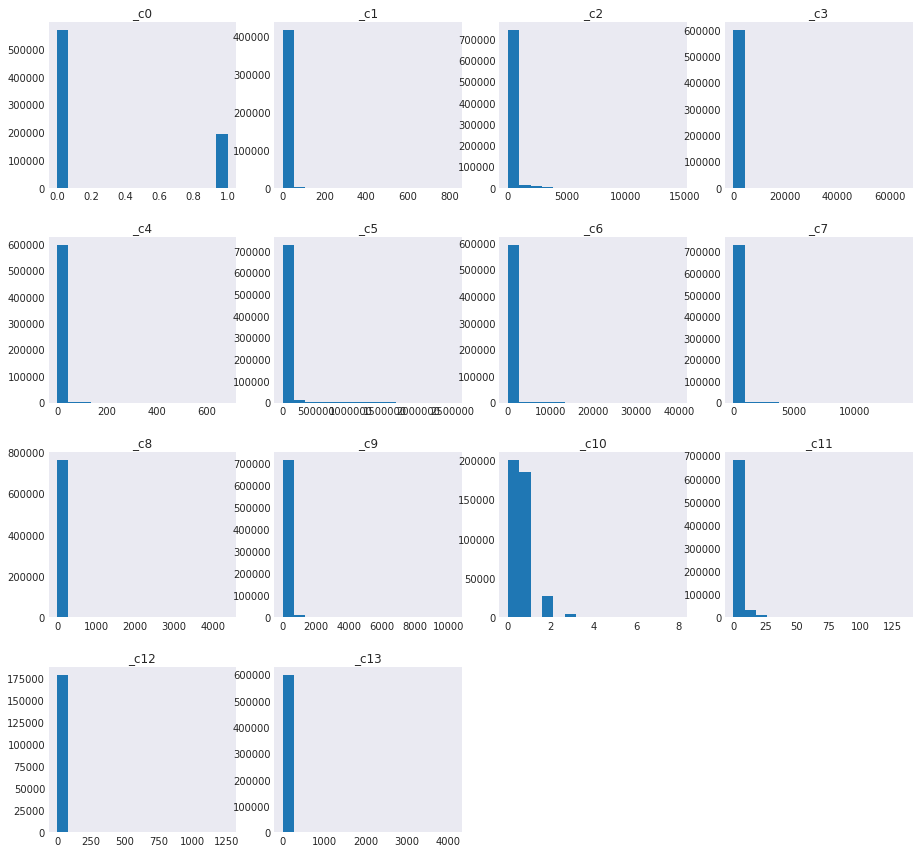

In [9]:
start = time.time()

print("Numeric Variable Histograms:")

size = np.ceil(np.sqrt(len(df.columns[:14])))
fig = plt.figure(figsize=(6,4.5))
fig.subplots_adjust(left=0, right=2, bottom=0, top=2.5, hspace=0.3)

for c, i in enumerate(df.columns[:14]):
    ax = fig.add_subplot(size, size, c + 1)
    bins, counts = df.select(i).rdd.flatMap(lambda x: x).histogram(15)
    ax.hist(bins[:-1], bins=bins, weights=counts)
    ax.set_title(df.columns[c])
    
print(f'... completed job in {time.time() - start} seconds.')

Numeric Variable Histogram Log Transformations:
... completed job in 40.96292471885681 seconds.


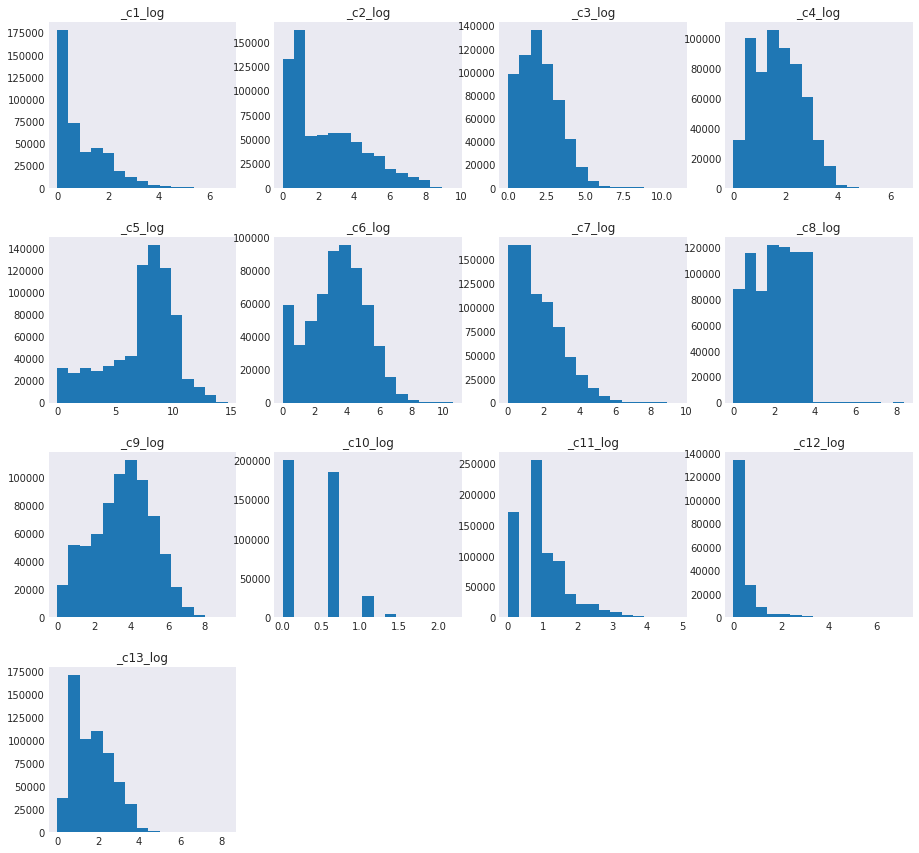

In [10]:
start = time.time()

print("Numeric Variable Histogram Log Transformations:")

# taking the natural log
log_df = df.select(*(log(col(i) + 1).alias(i+"_log") for i in df.columns[1:14]))

size = np.ceil(np.sqrt(len(log_df.columns)))
fig = plt.figure(figsize=(6,4.5))
fig.subplots_adjust(left=0, right=2, bottom=0, top=2.5, hspace=0.3)

for c, i in enumerate(log_df.columns):
    ax = fig.add_subplot(size, size, c + 1)
    bins, counts = log_df.select(i).rdd.flatMap(lambda x: x).histogram(15)
    ax.hist(bins[:-1], bins=bins, weights=counts)
    ax.set_title(log_df.columns[c])
    
print(f'... completed job in {time.time() - start} seconds.')

The log transformed versions of the histogram appear to have more normal distributions on average than the normal versions of the histograms without any transformations. All variables seemed to be at least slightly improved with a log distribution, and variables `_c6`, and `_c9` have very uniform distributions with the log transformation. Variables, such as `_c12` with many null values still show a right-skewed distribution, but we know that improving the distribution of this variable would be quite difficult given the limited amount of data. The log transformations of the data is discussed within our algorithm theory and can also be observed in the `Step_2_Feature_engineering_selection.ipynb` file.

Next, we will investigate a correlation matrix to understand the relationships between the numeric variables. We will impute the mean for all null values at this time to evaluate the potential correlations amongst the variables.

<br>

### Correlation Matrix

In [11]:
# getting just a numeric df
df_for_corr = df.select(df.columns[1:14])

In [12]:
# making all columns floats
df_for_corr = df_for_corr.select(*(col(i).cast("float").alias(i) for i in df_for_corr.columns))

In [13]:
# imputing the mean for the null values
imputer = Imputer(strategy = "mean", inputCols = df_for_corr.columns, 
                  outputCols = ["{}_mean".format(i) for i in df_for_corr.columns])
df_for_corr_mean = imputer.fit(df_for_corr).transform(df_for_corr)

In [14]:
# only keeping the new columns
df_for_corr_mean = df_for_corr_mean.select(df_for_corr_mean.columns[13:])

In [15]:
start = time.time()

# correlation matrix creation
all_columns = df_for_corr_mean.rdd.map(lambda row: row[0:])
corr_mat = Statistics.corr(all_columns, method = "pearson")

print(f'... completed job in {time.time() - start} seconds.')

... completed job in 11.697801351547241 seconds.


In [16]:
start = time.time()

# getting the correlation matrix back into a df with the proper column names
corr_rdd = sc.parallelize(corr_mat)

col_list = []
for i in df_for_corr_mean.columns:
    col_list.append(i)
    
col_str = ', '.join(col_list)
corr_df = corr_rdd.map(lambda x: x.tolist()).toDF(col_list)

print(f'... completed job in {time.time() - start} seconds.')

... completed job in 0.08914947509765625 seconds.


In [17]:
print("Correlation Matrix with Imputed Mean for all Numerical Columns:")
corr_df.select([round(i,2).alias(i) for i in corr_df.columns]).show()

Correlation Matrix with Imputed Mean for all Numerical Columns:
+--------+--------+--------+--------+--------+--------+---------+---------+---------+--------+--------+---------+--------+
|_c2_mean|_c4_mean|_c8_mean|_c6_mean|_c1_mean|_c5_mean|_c12_mean|_c10_mean|_c13_mean|_c3_mean|_c9_mean|_c11_mean|_c7_mean|
+--------+--------+--------+--------+--------+--------+---------+---------+---------+--------+--------+---------+--------+
|     1.0|   -0.09|   -0.03|   -0.02|    0.03|   -0.01|      0.0|     0.03|    -0.04|   -0.01|   -0.01|     0.03|    0.02|
|   -0.09|     1.0|    0.47|     0.0|    0.04|   -0.07|     0.01|     0.06|     0.61|    0.04|    0.17|     0.04|    0.02|
|   -0.03|    0.47|     1.0|    0.01|    0.04|   -0.11|     0.01|     0.05|     0.67|    0.04|     0.2|     0.12|    0.07|
|   -0.02|     0.0|    0.01|     1.0|   -0.07|    0.05|    -0.02|    -0.17|     0.05|     0.0|    0.18|    -0.09|   -0.05|
|    0.03|    0.04|    0.04|   -0.07|     1.0|   -0.01|     0.07|     0.42|

The correlation matrix above suggests that we do not have a large multicollinearity issue amongst the numeric variables; however, we do see some high correlations and clear relationships that could be cause for concern. Variables `_c4` and `_c13` have a correlation of 61% and variables `_c7` and `_c11` have a correlation of 68%. Interestingly, variables `_c4` and `_c13` have the exact same amount of null values as well at ~22% and `_c7` and `_c11` have the exact same amount of null values at ~4%. Given the high correlations and similar percentage of null values between these two sets of variables, a relationship is probable. Variables `_c8` and `_c13` also have a somewhat high correlation at 67%, but they do not have the same amount of null values. If we had more time, we would also investigate removing certain numeric variables with these high correlations in addition to variables with a high percentage of null values.

<br>

## Exploratory Data Analysis - Categorical Data

In this second large EDA section, we are looking at the categorical variables. We wanted to start out with the summary statistics here too with looking at the distinct counts per category and then the proportion of nulls within each category.

In [18]:
start = time.time()
print("Distinct Counts per Category:")
df.select([countDistinct(i).alias(i) for i in df.columns[14:]]).show()

print("Proportion of Nulls of Each Category:")
df.select([(round((1/total_count)*count(when(isnan(c) | col(c).isNull(), c)),3)).alias(c).alias(c) for c in df.columns[14:]]).show()
print(f'... completed job in {time.time() - start} seconds.')

Distinct Counts per Category:
+----+----+------+------+----+----+-----+----+----+-----+----+------+----+----+----+------+----+----+----+----+------+----+----+-----+----+-----+
|_c14|_c15|  _c16|  _c17|_c18|_c19| _c20|_c21|_c22| _c23|_c24|  _c25|_c26|_c27|_c28|  _c29|_c30|_c31|_c32|_c33|  _c34|_c35|_c36| _c37|_c38| _c39|
+----+----+------+------+----+----+-----+----+----+-----+----+------+----+----+----+------+----+----+----+----+------+----+----+-----+----+-----+
|1188| 549|284917|115407| 259|  16|10951| 523|   3|28805|4828|254427|3145|  27|8985|196549|  10|3899|1785|   3|230184|  13|  14|38695|  68|28259|
+----+----+------+------+----+----+-----+----+----+-----+----+------+----+----+----+------+----+----+----+----+------+----+----+-----+----+-----+

Proportion of Nulls of Each Category:
+----+----+-----+-----+----+-----+----+----+----+----+----+-----+----+----+----+-----+----+----+-----+-----+-----+-----+----+-----+-----+-----+
|_c14|_c15| _c16| _c17|_c18| _c19|_c20|_c21|_c22|_c23|_c2

The categorical variables have a wide range when it comes to their distinct counts of values, which can be observed above. Several variables have over 10K different values (on a toy training dataset of 100K), and other variables, like `_c22` have extremely few categories (only three within our toy training dataset). The distinct values per category numbers will likely change and get larger as we move to a larger dataset, but these relative benchmark numbers are helpful for us to keep in mind as we transform our categorical variables. Variables `_c32`, `_c33`, `_c38`, and `_c39` all have the same proportion of null values at 0.442, which speaks to the fact that there may be a relationship between these variables. These variables along with `c35` all have more than 40% of their values as null, suggesting that we could binarize these variables in some way or investigate these categories further if we had more time.

Next, we looked at the top 20 values of each categorical variable to see what percentage of the variable (including the null values) they represented.

In [19]:
start = time.time()

print("Counts and Percentages of Total DF for Each Category:")
for i in df.columns[14:]:
    df_count = df.groupby(i).count().sort(desc('count'))
    df_count.withColumn('total', sum('count').over(Window.partitionBy())) \
            .withColumn('percent', round((col('count')/total_count),4)).show()
print(f'... completed job in {time.time() - start} seconds.')

Counts and Percentages of Total DF for Each Category:
+--------+------+------+-------+
|    _c14| count| total|percent|
+--------+------+------+-------+
|05db9164|382197|763440| 0.5006|
|68fd1e64|127538|763440| 0.1671|
|5a9ed9b0| 63529|763440| 0.0832|
|8cf07265| 37859|763440| 0.0496|
|be589b51| 25170|763440|  0.033|
|5bfa8ab5| 18339|763440|  0.024|
|87552397| 13712|763440|  0.018|
|f473b8dc| 10796|763440| 0.0141|
|39af2607|  8360|763440|  0.011|
|ae82ea21|  6843|763440|  0.009|
|9a89b36c|  5843|763440| 0.0077|
|17f69355|  4875|763440| 0.0064|
|241546e0|  4063|763440| 0.0053|
|09ca0b81|  3584|763440| 0.0047|
|75ac2fe6|  3108|763440| 0.0041|
|41edac3d|  2794|763440| 0.0037|
|439a44a4|  2544|763440| 0.0033|
|7e5c2ff4|  2324|763440|  0.003|
|b455c6d7|  1956|763440| 0.0026|
|1464facd|  1802|763440| 0.0024|
+--------+------+------+-------+
only showing top 20 rows

+--------+-----+------+-------+
|    _c15|count| total|percent|
+--------+-----+------+-------+
|38a947a1|87515|763440| 0.1146|


From the tables below, we can see that over at least six variables, `_c18`, `_c21`, `_c22`, `_c27`, `_c32`, and `_c35` all have one or two values that cover over 60% of all values. For the most part, these variables also have some of the fewest distinct values, but category `_c32` has over 1,700 distinct values within its category (on our toy dataset of one million values). For these categories, we mostly took the process described in the algorithm theory of looking at the weighted average of the category and then bucketed accordingly. However, if we had more time and in future iterations of this work, we could definitely one-hot encode the values that make up some threshold of the variable (for instance 80%) and group the rest of the values as "other" as they are likely too rare to be predictive.

<br>

## Exploratory Data Analysis Challenges

### Hashed Categorical Variables
First, we were not familiar with the variables. This made it very difficult for us to understand the relationships between all of our features and which exact pieces of EDA to analyze and go into further detail. We also did not know anything about the categorical variables and the categories themselves are just a series of letters and numbers. Therefore, we were not able to extrapolate the meaning of any of the categories and why some of the categories may have had several values and others may have had very few values. We could not apply domain knowledge or expertise to supplement our data science judgements. The lack of context drove us to make conservative determinations about handling the categorical variables, including not was the main reason that we did not analyze any numeric and categorical features with one another.

### Long tail of observations in many of the categorical variables
From our initial EDA, we realized that we would need to address the long tail of observations in many of the categorical variables. With respect to this course, it was clear that if we one-hot encoded all categorical variables, we would end up with thousands if not millions of columns. This would be too much data to shuffle over the network, and would likely crash our Google Cloud clusters. Just a pass on the data to calculate the list of features to one-hot encode would have been computationally taxing. In addition, we had many rare instances of features so we would have likely been overfitting or needed to conduct some type of principal component analysis.

### EDA in Pyspark
Another challenge that we had was the learning curve of pyspark dataframes. We were determined not to use pandas at all so that the entire EDA process could theoretically be done, and refreshed or repeated, in a scalable fashion on the cloud. Making the histograms, subplots, and correlation matrix only using pyspark dataframes was quite a challenge due to limited experience with pyspark dataframes and limited available information online.

**Resources Referenced:**

* [Stack Overflow: Making histogram with Spark DataFrame column](https://stackoverflow.com/questions/36043256/making-histogram-with-spark-dataframe-column/36060072)
* [Stack Overflow: calculating percentages on a pyspark dataframe](https://stackoverflow.com/questions/43968946/calculating-percentages-on-a-pyspark-dataframe/46479716)
* [Stack Overflow: How to find count of Null and Nan values for each column in a PySpark dataframe efficiently?](https://stackoverflow.com/questions/44627386/how-to-find-count-of-null-and-nan-values-for-each-column-in-a-pyspark-dataframe)
* [Stack Overflow: Spark DataFrame: count distinct values of every column](https://stackoverflow.com/questions/40888946/spark-dataframe-count-distinct-values-of-every-column)
* [Databricks: How to calculate correlation matrix (with all columns at once) in pyspark dataframe?](https://forums.databricks.com/questions/3092/how-to-calculate-correlation-matrix-with-all-colum.html)
* [Apache Spark: Basic Statistics](https://spark.apache.org/docs/2.2.0/ml-statistics.html)

<br>
<br>

# __Section 4__ - Algorithm Implementation

**<font color='red'>
4. Algorithm Implementation -- develop a ‘homegrown’ implementation of the algorithm, apply it to the training dataset and evaluate your results on the test set.
</font>**

We created several models within this algorithm implementation to iterate and look at logistic regression and decision tree algorithms of all our implementations, which was 27 distinct models (including our baseline models). Due to the volume of models, we created several functions that could be used across some or all the models for ease of computing.

## Functions

In [8]:
def metrics(col_name):
    """Calculates key metrics on a binary column of 0s and 1s
    Input: Column Name
    Output: TP, FP, TN, FP, accuracy, precision, recall, F1 score
    """
    
    TP = train_set.filter(col('_c0')==0).filter(col(col_name)==0).count()
    FP = train_set.filter(col('_c0')==1).filter(col(col_name)==0).count()
    TN = train_set.filter(col('_c0')==1).filter(col(col_name)==1).count()
    FN = train_set.filter(col('_c0')==0).filter(col(col_name)==1).count()
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F1 = 2*(precision*recall)/(precision+recall)
    print("True Positives: {} \nFalse Positives: {} \nTrue Negatives: {} \nFalse Negatives: {} \nAccuracy: {} \nPrecision: {} \nRecall: {} \nF1 Score: {}".format(TP, FP, TN, FN, accuracy, precision, recall, F1))

In [9]:
def feature_prep (input_df):
    """Parses out types of features within a dataframe
    Input: Dataframe
    Output: Dataframe, Categorical Column List, Numeric Column List
    """
    
    # develop feature set
    dep_var = ['_c0']

    model_df = input_df.select(input_df.columns[1:])

    feature_df = model_df.select([column for column in model_df.columns 
                              if column not in dep_var])
    
    # numerical and categorical column split
    cat_cols = feature_df.columns[1:]
    num_cols = feature_df.columns[0]
    
    return model_df, cat_cols, num_cols

In [10]:
def column_vector_maker(df, columns, lookup_df, suffix):
    """One-hot encodes categorical variables
    Input: Dataframe, Categorical Column List, Lookup Dataframe, Suffix for New Columns
    Output: Dataframe, Categorical Column List, Numeric Column List
    """
    
    # Creating the lookup table vectors for each category
    # we are doing a map-side join
    for i in columns:
        new_col = str(i) + str(suffix)
        df = df.join(lookup_df, df[i]==lookup_df['id'], "left_outer" )
        df = df.withColumnRenamed("category", new_col) 
        lst = df.columns
        cols = [i for i in lst if i not in ['id']]
        df = df.select(cols)
        
    df = df.select([c for c in df.columns if c not in columns])
    
    cat_cols = df.columns[2:]
    num_cols = df.columns[0]
    
    return df, cat_cols, num_cols

In [11]:
def pipeline_prep (object_type):
    """Assembles a dataframe of label and feature fectors for machine learning algorithm
    Input: Dataframe, Categorical Column List, Numeric Column List
    Ouput: Dataframe
    """
    
    model_df = object_type[0]
    cat_cols = object_type[1]
    num_cols = object_type[2]

    # developing the string indexer and vector assembler of input and output columns
    label_stringIdx = StringIndexer(inputCol = '_c0', outputCol = 'label')

    assemblerInputs = cat_cols + [num_cols]
    assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
    
    # pipeline work for more setup
    pipeline = Pipeline(stages = [label_stringIdx, assembler])

    pipelineModel = pipeline.fit(model_df)
    model_df = pipelineModel.transform(model_df)

    selectedCols = ['label', 'features'] 
    model_df = model_df.select(selectedCols)
    return model_df

In [12]:
def lr_cross_validate (lr_model):
    """Hypertunes a logistic regression model based on a set of parameters
    Input: Logistic regression classification
    Output: Hypertuned logistic regression classification
    """

    # for elasticNetParam, 0 is L2 and 1 is L1
    paramGrid = ParamGridBuilder() \
        .addGrid(lr_model.elasticNetParam, [0.0, 0.25, 0.75, 1.0]) \
        .addGrid(lr_model.regParam, [0.0, 0.01, 0.1, 0.5, 0.75, 1.0, 1.25]) \
        .build()

    # optimizing for an f1 score
    crossval = CrossValidator(estimator = lr, estimatorParamMaps = paramGrid,
                              evaluator = MulticlassClassificationEvaluator(
                                  labelCol = "label", predictionCol="prediction", 
                                  metricName="f1"), numFolds=3)
    return crossval

In [13]:
def dt_cross_validate (dt_model):
    """Hypertunes a decision tree model based on a set of parameters
    Input: Decision tree classification
    Output: Hypertuned decision tree classification
    """

    paramGrid = ParamGridBuilder() \
        .addGrid(dt_model.maxBins, [28, 30, 32, 34, 36]) \
        .addGrid(dt_model.maxDepth, [3, 4, 5, 6, 7]) \
        .addGrid(dt_model.impurity, ['gini', 'entropy']) \
        .build()

    # optimizing for an f1 score
    crossval = CrossValidator(estimator = dt, estimatorParamMaps = paramGrid,
                              evaluator = MulticlassClassificationEvaluator(
                                  labelCol = "label", predictionCol="prediction", 
                                  metricName="f1"), numFolds=3)
    return crossval

In [14]:
def train_results (trainingSummary):
    """Showcases key metrics on logistic regression training summary
    Input: Logistic regression training model
    Output: Training set accuracy, precision, recall, F1 score
    """

    # predicting on the training set
    falsePositiveRate = trainingSummary.weightedFalsePositiveRate
    truePositiveRate = trainingSummary.weightedTruePositiveRate
    accuracy = trainingSummary.accuracy
    precision = trainingSummary.weightedPrecision
    recall = trainingSummary.weightedRecall
    f1 = trainingSummary.weightedFMeasure()

    print("False Positive Rate: %s\nTrue Positive Rate: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s\nF1 Score: %s"
          % (falsePositiveRate, truePositiveRate, accuracy, precision, recall, f1))

In [15]:
def test_results (predictions):
    """Showcases key metrics on all algorithm test datasets
    Input: Classification training model
    Output: Testing set accuracy, precision, recall, F1 score
    """
    
    evaluator = MulticlassClassificationEvaluator(labelCol = "label", predictionCol="prediction", metricName="accuracy")
    print("Accuracy:", evaluator.evaluate(predictions))

    evaluator = MulticlassClassificationEvaluator(labelCol = "label", predictionCol="prediction", metricName="weightedPrecision")
    print("Precision:", evaluator.evaluate(predictions))
    
    evaluator = MulticlassClassificationEvaluator(labelCol = "label", predictionCol="prediction", metricName="weightedRecall")
    print("Recall:", evaluator.evaluate(predictions))
    
    evaluator = MulticlassClassificationEvaluator(labelCol = "label", predictionCol="prediction", metricName="f1")
    print("F1 Score:", evaluator.evaluate(predictions))

In [16]:
def to_array(col):
    """Separating a vector into distinct columns
    Input: Vector column
    Output: Separate array columns of vector
    """
    
    # separating a vector into its array types
    def to_array_(v):
        return v.toArray().tolist()
    return udf(to_array_, ArrayType(DoubleType())).asNondeterministic()(col)

<br>

## Baseline Model: Predicting the Majority / Random Class

We started out with a baseline model. The goal of our baseline model is to develop a "baseline" threshold for our f1-score; essentially this model represents the f1-score that we would like to beat. We created three different baseline models to cover all potential approaches. Our first baseline model with the column `predict_0` predicted all rows as the majority class of not clicking through the ad, which is 0. The f1-score here is fairly high at 0.86, but we know this is likely to be true with our high amount of class unbalance. We have no true negatives or false negatives in this model because everything is predicted as the majority class of 0.

Therefore, we created two, more balanced models. Our first balanced model, `random_1_0_weighted`, randomly assigns 75% of the predicted values to the majority class of 0, and the other 25% or so of the values to the minority class of 1. We produced this weighted split as this split is directionally similar to the actual class split in the data. The f1-score here is 0.73, which is slightly higher than the f1-score of many of our best models. This model shows that we do have quite a bit of room to improve within our logistic and decision tree models below. Our second balanced model, `random_1_0`, randomly assigns a 1 or 0 as the prediction. The f1-score in this case is 58%, which is lower than the f1-scores in our best models depicted model.

In [29]:
# split data into train and test set 0.8 train, 0.2 test
# completed this split from a theoretical standpoint
splits = df.randomSplit([0.8,0.2], seed=2019)
train_set =  splits[0]
test_set = splits[1]

# all dataframes
type(df), type(train_set), type(test_set)

(pyspark.sql.dataframe.DataFrame,
 pyspark.sql.dataframe.DataFrame,
 pyspark.sql.dataframe.DataFrame)

In [30]:
train_set = train_set.withColumn('predict_0',  lit(0))
train_set = train_set.withColumn("random_1_0_weighted", round((rand(seed = 2019) * 4) * .168))
train_set = train_set.withColumn("random_1_0", round((rand(seed = 2019) * 1)))

train_set.select(['_c0','predict_0','random_1_0_weighted','random_1_0']).show(10)

+---+---------+-------------------+----------+
|_c0|predict_0|random_1_0_weighted|random_1_0|
+---+---------+-------------------+----------+
|  0|        0|                0.0|       1.0|
|  0|        0|                0.0|       0.0|
|  0|        0|                0.0|       1.0|
|  0|        0|                1.0|       1.0|
|  0|        0|                0.0|       0.0|
|  0|        0|                0.0|       1.0|
|  0|        0|                0.0|       0.0|
|  0|        0|                0.0|       0.0|
|  0|        0|                0.0|       1.0|
|  0|        0|                0.0|       0.0|
+---+---------+-------------------+----------+
only showing top 10 rows



In [31]:
# Checking the distributions of the baseline outcome variables
train_set.groupBy(['predict_0']).count().show()
train_set.groupBy(['random_1_0_weighted']).count().show()
train_set.groupBy(['random_1_0']).count().show()

+---------+------+
|predict_0| count|
+---------+------+
|        0|610367|
+---------+------+

+-------------------+------+
|random_1_0_weighted| count|
+-------------------+------+
|                0.0|453848|
|                1.0|156519|
+-------------------+------+

+----------+------+
|random_1_0| count|
+----------+------+
|       0.0|305106|
|       1.0|305261|
+----------+------+



In [32]:
print("Majority Class Prediction Baseline Model:")
metrics('predict_0')

Majority Class Prediction Baseline Model:
True Positives: 454082 
False Positives: 156285 
True Negatives: 0 
False Negatives: 0 
Accuracy: 0.743949132243388 
Precision: 0.743949132243388 
Recall: 1.0 
F1 Score: 0.8531775594697351


In [33]:
print("Weighted Randomized Baseline Model:")
metrics('random_1_0_weighted')

Weighted Randomized Baseline Model:
True Positives: 337619 
False Positives: 116229 
True Negatives: 40056 
False Negatives: 116463 
Accuracy: 0.6187670696482608 
Precision: 0.7439032451393418 
Recall: 0.7435198928827833 
F1 Score: 0.7437115196105426


In [34]:
print("Fully Randomized Baseline Model:")
metrics('random_1_0')

Fully Randomized Baseline Model:
True Positives: 226850 
False Positives: 78256 
True Negatives: 78029 
False Negatives: 227232 
Accuracy: 0.49950111981807666 
Precision: 0.7435120908798909 
Recall: 0.4995793711268009 
F1 Score: 0.597612185650985


<br>

## Reading in the Parquet Model Files

In [17]:
# read parquet files of features
start = time.time()
mean_wgt_HL_df = spark.read.parquet("data/df_mean_wgt_HL.parquet")
mean_wgt_HLM_df = spark.read.parquet("data/df_mean_wgt_HLM.parquet")
mean_wv_df = spark.read.parquet("data/df_mean_wv.parquet")
zero_wgt_HL_df = spark.read.parquet("data/df_zero_wgt_HL.parquet")
zero_wgt_HLM_df = spark.read.parquet("data/df_zero_wgt_HLM.parquet")
zero_wv_df = spark.read.parquet("data/df_zero_wv.parquet")
print(f'... completed job in {time.time() - start} seconds.')

... completed job in 1.9357154369354248 seconds.


In [18]:
# read parquet files of features
start = time.time()
mean_wgt_HL_test_df = spark.read.parquet("data/test_df_mean_wgt_HL.parquet")
mean_wgt_HLM_test_df = spark.read.parquet("data/test_df_mean_wgt_HLM.parquet")
mean_wv_test_df = spark.read.parquet("data/test_df_mean_wv.parquet")
zero_wgt_HL_test_df = spark.read.parquet("data/test_df_zero_wgt_HL.parquet")
zero_wgt_HLM_test_df = spark.read.parquet("data/test_df_zero_wgt_HLM.parquet")
zero_wv_test_df = spark.read.parquet("data/test_df_zero_wv.parquet")
print(f'... completed job in {time.time() - start} seconds.')

... completed job in 1.558964490890503 seconds.


In [19]:
# broadcasting the lookup dataframe as we have to use it multiple times
lookup_df_HL = broadcast(spark.createDataFrame(
    [('H',  Vectors.dense(1.0)), 
     ('L', Vectors.dense(0.0))],
    ["id", "category"]))

In [20]:
# broadcasting the lookup dataframe as we have to use it multiple times
lookup_df_HLM = broadcast(spark.createDataFrame(
    [('H6', Vectors.dense(1.0,0.0,0.0)), 
     ('H1', Vectors.dense(0.0,1.0,0.0)),
     ('L',  Vectors.dense(0.0,0.0,1.0)),
     ('M',  Vectors.dense(0.0,0.0,0.0))],
    ["id", "category"]))

In [21]:
f1_scores = {}
evaluator = MulticlassClassificationEvaluator(labelCol = "label", 
                                              predictionCol="prediction", 
                                              metricName="f1")

The algorithm model matrix that we used for our modeling approaches is below as well as described in our algorithm theory in section two and motivated by our EDA in section three.

* **3 Transformation Types** - We examined three approaches to handle the fact that we have several distinct values per categorical feature. One-hot encoding all features alone would have led to potentially over a million columns and would not have allowed for a scalable implementation. Based on Brieman's theorem, we first computed the weighted average of the target variable (our click-through rate) for every value within each category. Then we decided to explore three options:
 + Split the categorical feature by two bins (high and low) based on the average value of the target variable. We imputed all null values with the low bins. All models below ending in `wgt_HL` have this categorical transformation.
 + Split the categorical feature by four bins (high, middle, low) based on the average value of the target variable. We put all null values in their own, missing bin. All models below ending in `wgt_HLM` have this categorical transformation.
 + Transformed the categorical features to numeric features using the weighted average values of the target variable. We imputed the mean for all missing values. All models below ending in `wv` have this categorical transformation.<br> <br>
* **2 Imputing Methods** - Many of our numeric variables had a high percentage of null values. Therefore, we used two different imputing techniques:
 + Replace missing values with the respective mean of each numeric column. All models below with the word `mean` will have this numeric transformation.
 + Replace missing values with zero. All models below with the word `zero` will have this numeric transformation.<br> <br>
* **2 Algorithms** - We used two different algorithms as discussed above:
 + Logistic Regression - Algorithm used to calculate the probability of a binary result (where the values are 1s or 0s) given some initial features. All models below with the word `lr` are using this algorithm.
 + Decision Trees - Algorithm used to predict features impacting dependent variable most. Works by dividing the data in homogenous subsets using binary recursive partitions. All models below with the word `dt` are using this algorithm.<br> <br>
* **2 Model Runs** - In order to make sure that we are using the best parameters if the best ones are better than the default
 + Normal / Default Run - Algorithm uses default parameters. Logistic regression algorithm max iterations is set to 10 for speed, although the max iterations is 100. Decision tree algorithm max depth (layers of the tree) is set to 3, which is also the default.
 + Hypertuned Run - For the logistic regression algorithm, we hypertuned the learning rate and the regularization parameter. For the decision tree algorithm, we hypertuned the bin size, the maximum depth of the tree, and the impurity. All models with hypertuning have `tuned` in the name.

**<center>Algorithm Modeling Matrix</center>**

|	 3 Transformation Types	|	2 Imputing Methods	|	2 Algorithms	|	2 Model Runs	|
|	---	|	---	|	---	|	---	|
|	Weighted Value	|	Nulls => Mean	|	Logistic Regression	|	Default	|
|	Hi Low	|	Nulls => 0	|	Decision Tree	|	Hypertuned	|
|	Hi Mid Low Missing	|		|		|		|

Of the models listed in the matrix above, we succeeded in running the categorical Hi Low and Hi Mid Low Missing transformations with a zero imputed numeric transformation through the logistic regression and decision tree algorithms at the default and hypertuned levels.

<br>

## Logistic Regression

### HL Categorical Transformation with Numeric Mean

In [22]:
start = time.time()

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HL_df)[0], 
                                  feature_prep(mean_wgt_HL_df)[1], lookup_df_HL, "HL")))
trainingSummary = lrModel.summary
print("Train Results:")
train_results(trainingSummary)

print("\nTest Results:")
predictions = lrModel.transform(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HL_test_df)[0], 
                                  feature_prep(mean_wgt_HL_test_df)[1], lookup_df_HL, "HL")))
test_results(predictions)

f1_scores['lr_mean_wgt_HL'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Train Results:
False Positive Rate: 0.3745238151050068
True Positive Rate: 0.8118787549130277
Accuracy: 0.8118787549130277
Precision: 0.8021746110178296
Recall: 0.8118787549130277
F1 Score: 0.8041246150444501

Test Results:
Accuracy: 0.7444879240623755
Precision: 0.7100080698027813
Recall: 0.7444879240623754
F1 Score: 0.7147520025627844
... completed job in 171.169527053833 seconds.


In [23]:
# parameter tuned
start = time.time()

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr_cross_validate(lr).fit(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HL_df)[0], 
                                  feature_prep(mean_wgt_HL_df)[1], lookup_df_HL, "HL")))

print("Test Results:")
predictions = lrModel.transform(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HL_test_df)[0], 
                                  feature_prep(mean_wgt_HL_test_df)[1], lookup_df_HL, "HL")))
test_results(predictions)

f1_scores['lr_mean_wgt_HL_tuned'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.738660639041503
Precision: 0.7048795610332903
Recall: 0.738660639041503
F1 Score: 0.7117184318627955
... completed job in 620.6293642520905 seconds.


<br>

### HLM Categorical Transformation with Numeric Mean

In [24]:
start = time.time()

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HLM_df)[0], 
                                  feature_prep(mean_wgt_HLM_df)[1], lookup_df_HLM, "HLM")))
trainingSummary = lrModel.summary
print("Train Results:")
train_results(trainingSummary)

print("\nTest Results:")
predictions = lrModel.transform(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HLM_test_df)[0], 
                                  feature_prep(mean_wgt_HLM_test_df)[1], lookup_df_HLM, "HLM")))
test_results(predictions)

f1_scores['lr_mean_wgt_HLM'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Train Results:
False Positive Rate: 0.36471481676247897
True Positive Rate: 0.8551068455535769
Accuracy: 0.8551068455535767
Precision: 0.8554947375241826
Recall: 0.8551068455535769
F1 Score: 0.8419210614159758

Test Results:
Accuracy: 0.7546856728489022
Precision: 0.716799633812184
Recall: 0.7546856728489022
F1 Score: 0.7040270427063684
... completed job in 112.92387413978577 seconds.


In [25]:
# parameter tuned
start = time.time()

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr_cross_validate(lr).fit(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HLM_df)[0], 
                                  feature_prep(mean_wgt_HLM_df)[1], lookup_df_HLM, "HLM")))

print("Test Results:")
predictions = lrModel.transform(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HLM_test_df)[0], 
                                  feature_prep(mean_wgt_HLM_test_df)[1], lookup_df_HLM, "HLM")))
test_results(predictions)

f1_scores['lr_mean_wgt_HLM_tuned'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7528956772258988
Precision: 0.7127505302503129
Recall: 0.7528956772258987
F1 Score: 0.6983002650218749
... completed job in 605.7316727638245 seconds.


<br>

### HL Categorical Transformation with Numeric Zero

In [26]:
start = time.time()

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HL_df)[0], 
                                  feature_prep(zero_wgt_HL_df)[1], lookup_df_HL, "HL")))
trainingSummary = lrModel.summary
print("Train Results:")
train_results(trainingSummary)

print("\nTest Results:")
predictions = lrModel.transform(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HL_test_df)[0], 
                                  feature_prep(zero_wgt_HL_test_df)[1], lookup_df_HL, "HL")))
test_results(predictions)

f1_scores['lr_zero_wgt_HL'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Train Results:
False Positive Rate: 0.36627955390990147
True Positive Rate: 0.8113135212093707
Accuracy: 0.8113135212093707
Precision: 0.8024400463498507
Recall: 0.8113135212093707
F1 Score: 0.8047317550595157

Test Results:
Accuracy: 0.7438607723112501
Precision: 0.7095602983139156
Recall: 0.7438607723112501
F1 Score: 0.7146179244156552
... completed job in 141.03413319587708 seconds.


In [27]:
# parameter tuned
start = time.time()

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr_cross_validate(lr).fit(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HL_df)[0], 
                                  feature_prep(zero_wgt_HL_df)[1], lookup_df_HL, "HL")))

print("Test Results:")
predictions = lrModel.transform(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HL_test_df)[0], 
                                  feature_prep(zero_wgt_HL_test_df)[1], lookup_df_HL, "HL")))
test_results(predictions)

f1_scores['lr_zero_wgt_HL_tuned'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7448602954146061
Precision: 0.7102045212035304
Recall: 0.7448602954146062
F1 Score: 0.7147222640983938
... completed job in 606.7404642105103 seconds.


<br>

### HLM Categorical Transformation with Numeric Zero

In [28]:
start = time.time()

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HLM_df)[0], 
                                  feature_prep(zero_wgt_HLM_df)[1], lookup_df_HLM, "HLM")))
trainingSummary = lrModel.summary
print("Train Results:")
train_results(trainingSummary)

print("\nTest Results:")
predictions = lrModel.transform(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HLM_test_df)[0], 
                                  feature_prep(zero_wgt_HLM_test_df)[1], lookup_df_HLM, "HLM")))
test_results(predictions)

f1_scores['lr_zero_wgt_HLM'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Train Results:
False Positive Rate: 0.35725649939459386
True Positive Rate: 0.8582688775769332
Accuracy: 0.8582688775769333
Precision: 0.8589770336333523
Recall: 0.8582688775769332
F1 Score: 0.845682384187086

Test Results:
Accuracy: 0.754986183062983
Precision: 0.7171827893285674
Recall: 0.754986183062983
F1 Score: 0.7003339149104107
... completed job in 112.11254262924194 seconds.


In [29]:
# parameter tuned
start = time.time()

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr_cross_validate(lr).fit(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HLM_df)[0], 
                                  feature_prep(zero_wgt_HLM_df)[1], lookup_df_HLM, "HLM")))

print("Test Results:")
predictions = lrModel.transform(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HLM_test_df)[0], 
                                  feature_prep(zero_wgt_HLM_test_df)[1], lookup_df_HLM, "HLM")))
test_results(predictions)

f1_scores['lr_zero_wgt_HLM_tuned'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.754986183062983
Precision: 0.7171827893285674
Recall: 0.754986183062983
F1 Score: 0.7003339149104107
... completed job in 585.4295964241028 seconds.


<br>

### Weighted Average Categorical Transformation with Numeric Mean

In [30]:
start = time.time()

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(pipeline_prep(feature_prep(mean_wv_df)))
trainingSummary = lrModel.summary
print("Train Results:")
train_results(trainingSummary)

print("\nTest Results:")
predictions = lrModel.transform(pipeline_prep(feature_prep(mean_wv_test_df)))
test_results(predictions)

f1_scores['lr_mean_wv'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Train Results:
False Positive Rate: 0.3050630198520408
True Positive Rate: 0.8588652400932554
Accuracy: 0.8588652400932554
Precision: 0.8539264625046437
Recall: 0.8588652400932554
F1 Score: 0.852348772157915

Test Results:
Accuracy: 0.7546007460492706
Precision: 0.7226044451909592
Recall: 0.7546007460492706
F1 Score: 0.7235822798103525
... completed job in 59.604304790496826 seconds.


In [31]:
# parameter tuned
start = time.time()

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr_cross_validate(lr).fit(pipeline_prep(feature_prep(mean_wv_df)))

print("Test Results:")
predictions = lrModel.transform(pipeline_prep(feature_prep(mean_wv_test_df)))
test_results(predictions)

f1_scores['lr_mean_wv_tuned'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7546007460492706
Precision: 0.7226044451909592
Recall: 0.7546007460492706
F1 Score: 0.7235822798103525
... completed job in 334.36239862442017 seconds.


<br>

### Weighted Average Categorical Transformation with Numeric Zero

In [32]:
start = time.time()

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(pipeline_prep(feature_prep(zero_wv_df)))
trainingSummary = lrModel.summary
print("Train Results:")
train_results(trainingSummary)

print("\nTest Results:")
predictions = lrModel.transform(pipeline_prep(feature_prep(zero_wv_test_df)))
test_results(predictions)

f1_scores['lr_zero_wv'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Train Results:
False Positive Rate: 0.30583408283477376
True Positive Rate: 0.8583196666923343
Accuracy: 0.8583196666923343
Precision: 0.8533163305968405
Recall: 0.8583196666923343
F1 Score: 0.8517899695793342

Test Results:
Accuracy: 0.7569003024700633
Precision: 0.7255050987700802
Recall: 0.7569003024700633
F1 Score: 0.7253463048184301
... completed job in 57.23364210128784 seconds.


In [33]:
# parameter tuned
start = time.time()

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr_cross_validate(lr).fit(pipeline_prep(feature_prep(zero_wv_df)))

print("Test Results:")
predictions = lrModel.transform(pipeline_prep(feature_prep(zero_wv_test_df)))
test_results(predictions)

f1_scores['lr_zero_wv_tuned'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7569003024700633
Precision: 0.7255050987700802
Recall: 0.7569003024700633
F1 Score: 0.7253463048184301
... completed job in 331.35326170921326 seconds.


<br>

## Decision Tree

### HL Categorical Transformation with Numeric Mean

In [34]:
start = time.time()

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HL_df)[0], 
                                  feature_prep(mean_wgt_HL_df)[1], lookup_df_HL, "HL")))

print("Test Results:")
predictions = dtModel.transform(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HL_test_df)[0], 
                                  feature_prep(mean_wgt_HL_test_df)[1], lookup_df_HL, "HL")))
test_results(predictions)

f1_scores['dt_mean_wgt_HL'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7023642314451275
Precision: 0.6889538380385171
Recall: 0.7023642314451275
F1 Score: 0.6948403410840417
... completed job in 182.1031002998352 seconds.


In [35]:
# parameter tuned
start = time.time()

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt_cross_validate(dt).fit(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HL_df)[0], 
                                  feature_prep(mean_wgt_HL_df)[1], lookup_df_HL, "HL")))

print("Test Results:")
predictions = dtModel.transform(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HL_test_df)[0], 
                                  feature_prep(mean_wgt_HL_test_df)[1], lookup_df_HL, "HL")))
test_results(predictions)

f1_scores['dt_mean_wgt_HL_tuned'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7271955210912441
Precision: 0.6973291677123316
Recall: 0.727195521091244
F1 Score: 0.7062929535369874
... completed job in 846.7514927387238 seconds.


<br>

### HLM Categorical Transformation with Numeric Mean

In [36]:
start = time.time()

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HLM_df)[0], 
                                  feature_prep(mean_wgt_HLM_df)[1], lookup_df_HLM, "HLM")))

print("Test Results:")
predictions = dtModel.transform(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HLM_test_df)[0], 
                                  feature_prep(mean_wgt_HLM_test_df)[1], lookup_df_HLM, "HLM")))
test_results(predictions)

f1_scores['dt_mean_wgt_HLM'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7453567905509136
Precision: 0.6858876822973996
Recall: 0.7453567905509135
F1 Score: 0.6609785316420668
... completed job in 141.03395009040833 seconds.


In [37]:
# parameter tuned
start = time.time()

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt_cross_validate(dt).fit(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HLM_df)[0], 
                                  feature_prep(mean_wgt_HLM_df)[1], lookup_df_HLM, "HLM")))

print("Test Results:")
predictions = dtModel.transform(pipeline_prep(column_vector_maker(feature_prep(mean_wgt_HLM_test_df)[0], 
                                  feature_prep(mean_wgt_HLM_test_df)[1], lookup_df_HLM, "HLM")))
test_results(predictions)

f1_scores['dt_mean_wgt_HLM_tuned'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7505177268362154
Precision: 0.7073855175342934
Recall: 0.7505177268362154
F1 Score: 0.6938219876009833
... completed job in 828.3962671756744 seconds.


<br>

### HL Categorical Transformation with Numeric Zero

In [38]:
start = time.time()

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HL_df)[0], 
                                  feature_prep(zero_wgt_HL_df)[1], lookup_df_HL, "HL")))

print("Test Results:")
predictions = dtModel.transform(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HL_test_df)[0], 
                                  feature_prep(zero_wgt_HL_test_df)[1], lookup_df_HL, "HL")))
test_results(predictions)

f1_scores['dt_zero_wgt_HL'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7057090407844623
Precision: 0.6884282574940056
Recall: 0.7057090407844623
F1 Score: 0.6956540110907865
... completed job in 165.98070812225342 seconds.


In [39]:
# parameter tuned
start = time.time()

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt_cross_validate(dt).fit(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HL_df)[0], 
                                  feature_prep(zero_wgt_HL_df)[1], lookup_df_HL, "HL")))

print("Test Results:")
predictions = dtModel.transform(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HL_test_df)[0], 
                                  feature_prep(zero_wgt_HL_test_df)[1], lookup_df_HL, "HL")))
test_results(predictions)

f1_scores['dt_zero_wgt_HL_tuned'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7427175269315948
Precision: 0.7048040357440635
Recall: 0.7427175269315947
F1 Score: 0.7089055295858424
... completed job in 847.7946429252625 seconds.


<br>

### HLM Categorical Transformation with Numeric Zero

In [40]:
start = time.time()

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HLM_df)[0], 
                                  feature_prep(zero_wgt_HLM_df)[1], lookup_df_HLM, "HLM")))

print("Test Results:")
predictions = dtModel.transform(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HLM_test_df)[0], 
                                  feature_prep(zero_wgt_HLM_test_df)[1], lookup_df_HLM, "HLM")))
test_results(predictions)

f1_scores['dt_zero_wgt_HLM'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7453567905509136
Precision: 0.6858876822973996
Recall: 0.7453567905509135
F1 Score: 0.6609785316420668
... completed job in 141.77455115318298 seconds.


In [41]:
# parameter tuned
start = time.time()

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt_cross_validate(dt).fit(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HLM_df)[0], 
                                  feature_prep(zero_wgt_HLM_df)[1], lookup_df_HLM, "HLM")))

print("Test Results:")
predictions = dtModel.transform(pipeline_prep(column_vector_maker(feature_prep(zero_wgt_HLM_test_df)[0], 
                                  feature_prep(zero_wgt_HLM_test_df)[1], lookup_df_HLM, "HLM")))
test_results(predictions)

f1_scores['dt_zero_wgt_HLM_tuned'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7518504243073566
Precision: 0.7175187131947449
Recall: 0.7518504243073566
F1 Score: 0.7182584478682227
... completed job in 810.8262243270874 seconds.


<br>

### Weighted Average Categorical Transformation with Numeric Mean

In [42]:
start = time.time()

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(pipeline_prep(feature_prep(mean_wv_df)))

print("Test Results:")
predictions = dtModel.transform(pipeline_prep(feature_prep(mean_wv_test_df)))
test_results(predictions)

f1_scores['dt_mean_wv'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.746682955191314
Precision: 0.6929897571547143
Recall: 0.746682955191314
F1 Score: 0.6677894034616959
... completed job in 49.69821238517761 seconds.


In [43]:
# parameter tuned
start = time.time()

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt_cross_validate(dt).fit(pipeline_prep(feature_prep(mean_wv_df)))

print("Test Results:")
predictions = dtModel.transform(pipeline_prep(feature_prep(mean_wv_test_df)))
test_results(predictions)

f1_scores['dt_mean_wv_tuned'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7529544727025668
Precision: 0.7152852153463204
Recall: 0.7529544727025668
F1 Score: 0.7097837141085723
... completed job in 503.74834060668945 seconds.


<br>

### Weighted Average Categorical Transformation with Numeric Zero

In [44]:
start = time.time()

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(pipeline_prep(feature_prep(zero_wv_df)))

print("Test Results:")
predictions = dtModel.transform(pipeline_prep(feature_prep(zero_wv_test_df)))
test_results(predictions)

f1_scores['dt_zero_wv'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.747205581650585
Precision: 0.6951316701660123
Recall: 0.747205581650585
F1 Score: 0.6693277700273779
... completed job in 48.91723656654358 seconds.


In [45]:
# parameter tuned
start = time.time()

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt_cross_validate(dt).fit(pipeline_prep(feature_prep(zero_wv_df)))

print("Test Results:")
predictions = dtModel.transform(pipeline_prep(feature_prep(zero_wv_test_df)))
test_results(predictions)

f1_scores['dt_zero_wv_tuned'] = format(evaluator.evaluate(predictions), '.6f')

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7550319128781693
Precision: 0.7238304084447137
Recall: 0.7550319128781693
F1 Score: 0.7252821114014038
... completed job in 505.7289569377899 seconds.


<br>

## Best Model Fine Tuning

Now that we have completed our modeling exercise, we will evaluate all f1 score results as well as deep dive into one logistic regression model and one decision tree model using the `mean_wgt_HLM_test_df` dataset. This dataset performed fairly well for both models, and we will discuss it more comprehensively below.

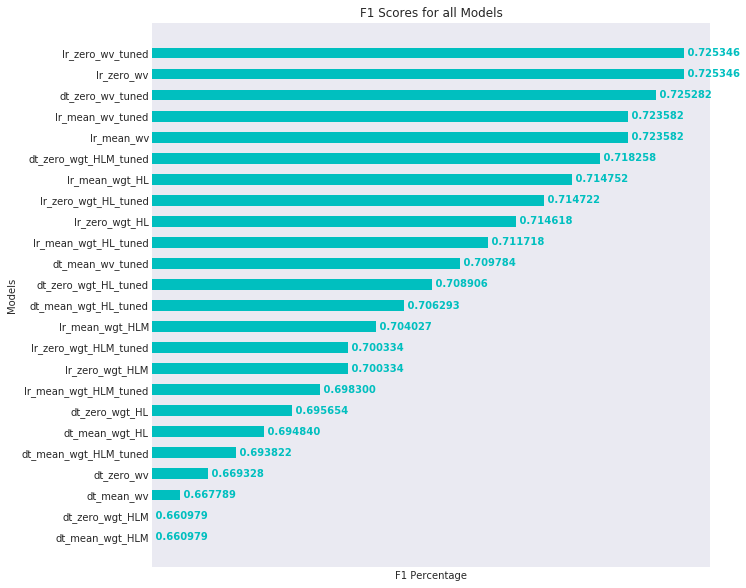

In [46]:
f1_scores_ordered = {k: v for k, v in sorted(f1_scores.items(), key=lambda item: item[1])}

keys = list(f1_scores_ordered.keys())
values = list(f1_scores_ordered.values())

plt.figure(figsize=(10,10))
plt.barh(range(len(f1_scores_ordered)), values, tick_label=keys, height=.5, color='c', align='center')

for i, v in enumerate(values):
    plt.text(v, i, " " + str(v), color='c', va='center', fontweight='bold')

# removing x-axis
plt.tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)
    
plt.title("F1 Scores for all Models")
plt.ylabel("Models")
plt.xlabel("F1 Percentage")
plt.show()

## Model Discussion and Review
Overall, we feel that the models we evaluated appeared to have reasonable F1 scores for initial attempts (at least better than coin flips), had a few surprising results, and clearly demonstrated the opportunity available from the next steps we have identified throughout this discussion.<br><br>
As discussed above, the baseline models we started with were useful for exploratory analysis and familiarity with the data and analysis, but not particularly useful for comparison to our actual model results (due to the high class imbalance and purely artificial modeling).  We do think that, compared to the 0.58 f1-score of the random_1_0 baseline model, even our worst model performs better than a coin-flip.  On the other hand, the random_1_0_weighted model, with an f1-score of 0.73 and a direct adjustment for the class imbalance, gives a clear indication that directly addressing the class imbalance in this dataset has the potential to dramatically improve the overall performance of our models.
Among our various model dimensions:<br>
* **3 Transformation Types** - In comparing the results of our 3 categorical variable transformations "high and low" vs "high, middle, low" vs "weighted average values of the target variable" (labeled `wgt_HL`, `wgt_HLM`, `wv`), there was an obvious difference between the three.  Of the 12 logistic regression scores, `wgt_HLM` f1-scores were ~0.70, `wgt_HL` f1-scores were ~0.71, and `wv` f1-scores were ~0.72.  Surprisingly, expanding our HL clustering to H,L and M did not prove fruitful. In contrast, using all categories using wv scoring tended to provide the best f1-scores.<br> <br>
* **2 Imputing Methods** - Between mean and zero imputation, there was very little difference on the 12 logistic regression scores.  As a next step, we would leverage the simplicity and performance efficiency of imputing zero, and consider other, more complex imputation methods for further optimizations.<br> <br>
* **2 Algorithms** - Logistic regression performed better than decision trees based on f1 scores where eight of the top twelve algorithms were in this class. Generally, decisions are expected to perform better. However, when classes are not well separated, such as in continuous variables, logistic regression models  can generalize better. Perhaps the transformation of categories to weight values may be responsible for this observation. However, we will feel that we have not explored this dataset fully to make this a recommendation.<br> <br>
* **2 Model Runs** - Within the linear regression models, tuning did not improve f1-scores, and in a couple cases actually reduced them.  We hypothesize that this is based on the random variability of the cross-validation folds, given that we only computed 3 folds per model, but may have also been due to poorly-documented features of the spark libraries that otherwise decreased performance in our case.<br> <br>

<br>

### Best Logistic Regression Model

In [21]:
# parameter tuned
start = time.time()

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr_cross_validate(lr).fit(pipeline_prep(feature_prep(zero_wv_df)))

print("Test Results:")
lr_predictions = lrModel.transform(pipeline_prep(feature_prep(zero_wv_test_df)))
test_results(lr_predictions)

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7569003024700633
Precision: 0.7255050987700802
Recall: 0.7569003024700633
F1 Score: 0.7253463048184301
... completed job in 382.6604161262512 seconds.


In [22]:
bestModel = lrModel.bestModel
print ('Best Param (elasticNetParam):', bestModel._java_obj.getElasticNetParam())
print ('Best Param (regParam):', bestModel._java_obj.getRegParam())

Best Param (elasticNetParam): 0.0
Best Param (regParam): 0.0


**<center>Logistic Regression Parameters</center>**

|	 Parameter Options	|	Parameter Values Tested	|	Default Parameters	|	Best Parameters	|
|	---	|	---	|	---	|	---	|
|	Regularization (elasticNetParam)	|	[0.0, 0.25, 0.75, 1.0]	|	0.0 = Ridge Regularization, L2	|	0.0	|
|	Learning Rate (regParam)	|	[0.0, 0.01, 0.1, 0.5, 0.75, 1.0, 1.25]	|	0.0 = Learning Rate per Iteration	|	0.0	|

The elasticNetParam mixing parameter is the regularization that takes values in the range of [0, 1]. A parameter of 0 is the L2, ridge regularization penalty, and a parameter of 1 is the L1, lasso regularization penalty. The fact that our model favored ridge regularization indicates that most of our variables impact the model results and have coefficient weights of roughly equal size. The regParam or learning rate is a regularization parameter that takes a value of greater than 0. For this best logistic regression model, a $\gamma = 0.01$ was the optimal learning rate through each iteration. This corresponds to a small learning rate and small updates to the model coefficients throughout each iteration.

<br>

#### Calculating Logistic Regression Log Loss

In addition to looking at the best model parameters, we will calculate the log loss for our logistic regression and decision tree best models. Log Loss is well used in logistics regression since the prediction function is non-linear as the it is a sigmoidal function. While not as frequent some analyst have used log loss in decision trees, which we looked at as well. In both instances the prediction is between 0 and 1 where the model uses probability to make this classification. This is the equation that asseses the log loss on a single observation: $-y_i \cdot log (\hat{y}) - (1 - y_i) \cdot log (1-\hat{y})$. The average of the single observation log loss's is the log loss of the model and should be minimized. 

The equation above denotes the actual results (0 or 1) as $y_i$ and the predicted as $\hat{y}$ ranging from 0 to 1. The acutal forces one side of the equation to be zero. For this reason, the log loss can be calculated for the range of probabilities between 0 and 1.

If the actual value is 1 ($y_i = 1$), we have evaluated two scenarios here of what would happen if the prediction were 1 and if the prediction probability were very far off at 0.5. The log loss increases exponentially based on how far away the prediction is from the actual value: $-1 \cdot log (1) = 0  $ and  $-1 \cdot log (0.5) = 0.69$. Therefore, the log loss penalizes predictions more if the prediction probability is further away from the actual value

Conversely, if the value actual value is zero ($y_i = 0$) the right side of the equation can be isolated and calculated. So if the prediction of $1$ is $0.1$ and the actual is $0$ then the loss is $0.11$: $- (1 - 0) \cdot log (1-0.1) = 0.11$

Pragmatically log loss is a useful tool to identify the best model during tuning. Log loss is convex guranteeing a global minima that will represent the best model. We chose to use the actual data to do a graph but a graph could be imputed with the range between 0 and 1 to show all the hypothetical loss for each prediction (1 or 0). This global minima will intersect. 

The decision tree log loss actual results tend to be very close to either one or zero and nothing in between. This is akin to Naive Bayes that may be over confident where a tool such as Laplace smoothing would help generalize the model and make log loss more useful. We have not been able to perform Laplace smoothing on our models, but would look into it further in the future.

In [23]:
lr_predictions.select("label", "features", "rawPrediction", "probability", "prediction").show(5)

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|(39,[0,1,4,5,6,7,...|[3.27495624342561...|[0.96355959820765...|       0.0|
|  0.0|[0.25305194484258...|[2.04684298964695...|[0.88562823150179...|       0.0|
|  0.0|[0.25673031619725...|[1.79207139649937...|[0.85718104806406...|       0.0|
|  0.0|[0.25673031619725...|[1.30896002948168...|[0.78733907914404...|       0.0|
|  0.0|[0.25667510250524...|[1.84772951258284...|[0.86386030130192...|       0.0|
+-----+--------------------+--------------------+--------------------+----------+
only showing top 5 rows



In [65]:
lr_predictions = lr_predictions.select("label", "probability", "prediction")

# separating out the probability array
lr_predictions = lr_predictions.withColumn("prob_array", to_array(col("probability"))).select(["label", "prediction", "probability"] + 
                                                                                              [col("prob_array")[0].alias('prob_label_0')] + 
                                                                                              [col("prob_array")[1].alias('prob_label_1')])

# Calculating the weighted log loss with the probabilities
lr_predictions = lr_predictions.withColumn('logloss', -(col('label') * log(col('prob_label_1'))) -  ((1 - col('label')) * log(1 - col('prob_label_1'))))

logloss = lr_predictions.agg(mean('logloss').alias('ll')).collect()[0]['ll']

In [66]:
lr_predictions.show(5,truncate=False)

+-----+----------+-----------------------------------------+------------------+--------------------+-------------------+
|label|prediction|probability                              |prob_label_0      |prob_label_1        |logloss            |
+-----+----------+-----------------------------------------+------------------+--------------------+-------------------+
|0.0  |0.0       |[0.9635595982076531,0.036440401792346915]|0.9635595982076531|0.036440401792346915|0.03712093709089472|
|0.0  |0.0       |[0.8856282315017958,0.1143717684982043]  |0.8856282315017958|0.1143717684982043  |0.12145801970625345|
|0.0  |0.0       |[0.8571810480640601,0.14281895193593996] |0.8571810480640601|0.14281895193593996 |0.154106124745114  |
|0.0  |0.0       |[0.7873390791440487,0.21266092085595129] |0.7873390791440487|0.21266092085595129 |0.23909627310748252|
|0.0  |0.0       |[0.8638603013019254,0.13613969869807466] |0.8638603013019254|0.13613969869807466 |0.14634421155900182|
+-----+----------+--------------

In [68]:
print ("The logistic regression log loss is:", format(logloss, '.6f'), 
       "and the intersection point below of the two probability \ncurves happens at this point of log loss")

The logistic regression log loss is: 0.562480 and the intersection point below of the two probability 
curves happens at this point of log loss


In [27]:
lr_predictions_0 = lr_predictions.filter(col('label').isin(0))
lr_pr_lab0_list = lr_predictions_0.select('prob_label_0').collect()
lr_logloss0_list = lr_predictions_0.select('logloss').collect()

lr_predictions_1 = lr_predictions.filter(col('label').isin(1))
lr_pr_lab1_list = lr_predictions_1.select('prob_label_1').collect()
lr_logloss1_list = lr_predictions_1.select('logloss').collect()

In [54]:
lr_pr_lab0_list_2 = [1.0 - lr_pr_lab0_list[i][0] for i in range(len(lr_pr_lab0_list))]

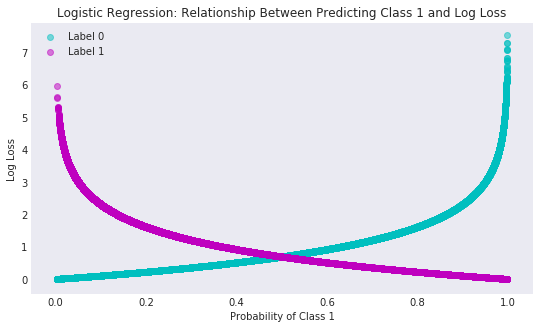

In [73]:
plt.figure(figsize=(9,5))

plt.scatter(lr_pr_lab0_list_2, lr_logloss0_list, alpha = 0.5, marker = 'o', color='c', label = "Label 0")
plt.scatter(lr_pr_lab1_list, lr_logloss1_list, alpha = 0.5, marker = 'o', color='m', label = "Label 1")
plt.legend(loc='upper left')
plt.xlabel("Probability of Class 1")
plt.ylabel("Log Loss")
plt.title("Logistic Regression: Relationship Between Predicting Class 1 and Log Loss")

plt.show()

<br>

### Best Decision Tree Model

In [29]:
# parameter tuned
start = time.time()

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt_cross_validate(dt).fit(pipeline_prep(feature_prep(zero_wv_df)))

print("Test Results:")
dt_predictions = dtModel.transform(pipeline_prep(feature_prep(zero_wv_test_df)))
test_results(dt_predictions)

print(f'... completed job in {time.time() - start} seconds.')

Test Results:
Accuracy: 0.7589320128304796
Precision: 0.7265470806742257
Recall: 0.7589320128304796
F1 Score: 0.7219152279862708
... completed job in 550.5507028102875 seconds.


In [30]:
print("Decision Tree Model Parameters:")
dtModel.getEstimatorParamMaps()[np.argmax(dtModel.avgMetrics)]

Decision Tree Model Parameters:


{Param(parent='DecisionTreeClassifier_8ac1461343cb', name='maxBins', doc='Max number of bins for discretizing continuous features.  Must be >=2 and >= number of categories for any categorical feature.'): 30,
 Param(parent='DecisionTreeClassifier_8ac1461343cb', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 7,
 Param(parent='DecisionTreeClassifier_8ac1461343cb', name='impurity', doc='Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini'): 'gini'}

**<center>Decision Tree Model Parameters</center>**

|	 Parameter Options	|	Parameter Values Tested	|	Default Parameters	|	Best Parameters	|
|	---	|	---	|	---	|	---	|
|	# of Bins (maxBins) 	|	[28, 30, 32, 34, 36]	|	32 = Bins	|	30	|
|	Depth of Trees (maxDepth)	|	[3, 4, 5, 6, 7]	|	5 = Layers of the Tree	|	7	|
|	Impurity	|	['gini', 'entropy']	|	gini = Impurity	|	gini	|

We found that the best parameters included a maximum number of bins of 30, a maximum depth of 7, and criterion gini. The maximum number of bins represents the number of node splits at each layer. The maximum depth represents the maximum depth of each decision tree, or the maximum number of levels of each of those trees. Limiting the depth of the trees in our random forest helps reduce the number of important features. We have to evaluate a balance between the number of nodes within each layer of the tree and maximum layers of the tree. We want to make sure that we conform to the train data, while not overfitting so much that we lose a goodness of fit between the train and test data. The criterion in this instance refers to the quality of each node split within our tree. The gini criterion was chosen as the best parameter over the entropy criterion. This measures how often a randomly chosen observation within our training data would be mislabeled.

<br>

#### Calculating Decision Tree Log Loss

In [31]:
dt_predictions.select("label", "features", "rawPrediction", "probability", "prediction").show(5)

+-----+--------------------+-----------------+--------------------+----------+
|label|            features|    rawPrediction|         probability|prediction|
+-----+--------------------+-----------------+--------------------+----------+
|  0.0|(39,[0,1,4,5,6,7,...|  [185936.0,26.0]|[0.99986018648971...|       0.0|
|  0.0|[0.25305194484258...|[53085.0,12345.0]|[0.81132508023842...|       0.0|
|  0.0|[0.25673031619725...|  [185936.0,26.0]|[0.99986018648971...|       0.0|
|  0.0|[0.25673031619725...|  [3924.0,1651.0]|[0.70385650224215...|       0.0|
|  0.0|[0.25667510250524...|[38687.0,12209.0]|[0.76011867337315...|       0.0|
+-----+--------------------+-----------------+--------------------+----------+
only showing top 5 rows



In [69]:
dt_predictions = dt_predictions.select("label", "probability", "prediction")

# separating out the probability array
dt_predictions = dt_predictions.withColumn("prob_array", to_array(col("probability"))).select(["label", "prediction", "probability"] + 
                                                                                              [col("prob_array")[0].alias('prob_label_0')] + 
                                                                                              [col("prob_array")[1].alias('prob_label_1')])

# calculating the weighted log loss with the probabilities
dt_predictions = dt_predictions.withColumn('logloss', -(col('label') * log(col('prob_label_1'))) -  ((1 - col('label')) * log(1 - col('prob_label_1'))))                              

logloss = dt_predictions.agg(mean('logloss').alias('ll')).collect()[0]['ll']

In [70]:
dt_predictions.show(5, truncate=False)

+-----+----------+-----------------------------------------+------------------+---------------------+---------------------+
|label|prediction|probability                              |prob_label_0      |prob_label_1         |logloss              |
+-----+----------+-----------------------------------------+------------------+---------------------+---------------------+
|0.0  |0.0       |[0.999860186489713,1.3981351028704788E-4]|0.999860186489713 |1.3981351028704788E-4|1.3982328510696475E-4|
|0.0  |0.0       |[0.8113250802384228,0.18867491976157727] |0.8113250802384228|0.18867491976157727  |0.20908646641611098  |
|0.0  |0.0       |[0.999860186489713,1.3981351028704788E-4]|0.999860186489713 |1.3981351028704788E-4|1.3982328510696475E-4|
|0.0  |0.0       |[0.7038565022421525,0.29614349775784754] |0.7038565022421525|0.29614349775784754  |0.3511807756430658   |
|0.0  |0.0       |[0.7601186733731531,0.2398813266268469]  |0.7601186733731531|0.2398813266268469   |0.27428070871657234  |
+-----+-

In [71]:
print ("The logistic regression log loss is:", format(logloss, '.6f'), 
       "and the intersection point below of the two probability \ncurves happens at this point of log loss")

The logistic regression log loss is: 0.600580 and the intersection point below of the two probability 
curves happens at this point of log loss


In [35]:
dt_predictions_0 = dt_predictions.filter(col('label').isin(0))
dt_pr_lab0_list = dt_predictions_0.select('prob_label_0').collect()
dt_logloss0_list = dt_predictions_0.select('logloss').collect()

dt_predictions_1 = dt_predictions.filter(col('label').isin(1))
dt_pr_lab1_list = dt_predictions_1.select('prob_label_1').collect()
dt_logloss1_list = dt_predictions_1.select('logloss').collect()

In [57]:
dt_pr_lab0_list_2 = [1.0 - dt_pr_lab0_list[i][0] for i in range(len(dt_pr_lab0_list))]

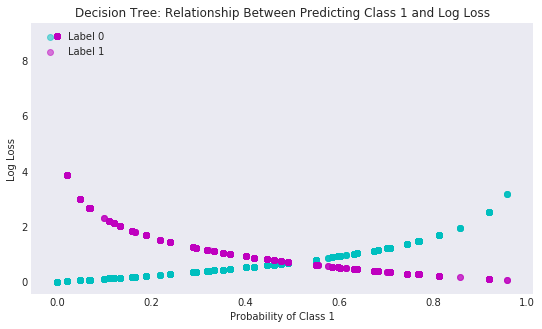

In [74]:
plt.figure(figsize=(9,5))

plt.scatter(dt_pr_lab0_list_2, dt_logloss0_list, alpha = 0.5, marker = 'o', color='c', label = "Label 0")
plt.scatter(dt_pr_lab1_list, dt_logloss1_list, alpha = 0.5, marker = 'o', color='m', label = "Label 1")
plt.legend(loc='upper left')
plt.xlabel("Probability of Class 1")
plt.ylabel("Log Loss")
plt.title("Decision Tree: Relationship Between Predicting Class 1 and Log Loss")

plt.show()

<br>

## Scaling the Models in Google Cloud

We were able to scale two of our models in the Google Cloud on the full dataset without the use of the log transformation. A diagram of what we were able to scale as well as pictures of the scaled models are below. Separately, we have a Jupyter Notebook in our Github of our results.

|	Categorical Transformation	|	Numeric Null Handling	|	 Scaling Worked - LR: vs. DT	|
|	-------	            |	-------	|	-------	|
|	Weighted	        |	impute  0 	|	LR: No; DT: No	|
|		                |	inpute mean	|	LR: No; DT: No	|
|	Hi, Lo, Medium (binning) based on weights Nulls converted to M	|	impute  0 	|	LR: Yes; DT: Yes	|
|		                |	inpute mean	|	LR: No; DT: No	|
|	Hi Lo (One hot encoding) 2	Nulls converted to L|	impute  0 	|	LR: Yes; DT: Yes	|
|		                |	inpute mean	|	LR: No; DT: No	|

### Logistic Regression Runs

**Logistic Regression Model: HL Categorical and Zero Numeric Transformations**

<img src="images/lr_zero_wgt_HL.png" style="width: 600px;" align="left">

**Logistic Regression Model: HL Categorical and Zero Numeric Transformation Tuned**

<img src="images/lr_zero_wgt_HLM_tuned.png" style="width: 600px;" align="left">

**Logistic Regression Model: HLM Categorical and Zero Numeric Transformations**

<img src="images/lr_zero_wgt_HLM.png" style="width: 600px;" align="left">

**Logistic Regression Model: HLM Categorical and Zero Numeric Transformations Tuned**

<img src="images/lr_zero_wgt_HLM_tuned.png" style="width: 600px;" align="left">

<br>

### Decision Tree Runs

**Decision Tree Model: HL Categorical and Zero Numeric Transformations**

<img src="images/dt_zero_wgt_HL.png" style="width: 600px;" align="left">

**Decision Tree Model: HL Categorical and Zero Numeric Transformations Tuned**

<img src="images/dt_zero_wgt_HL_tuned.png" style="width: 600px;" align="left">

**Decision Tree Model: HLM Categorical and Zero Numeric Transformations**

<img src="images/dt_zero_wgt_HLM.png" style="width: 600px;" align="left">

**Decision Tree Model: HLM Categorical and Zero Numeric Transformations Tuned**

<img src="images/dt_zero_wgt_HLM.png" style="width: 600px;" align="left">

<br>

**Resources Referenced:**

* [Towards Data Science: Spark MLlib Python Example — Machine Learning At Scale](https://towardsdatascience.com/machine-learning-at-scale-with-apache-spark-mllib-python-example-b32a9c74c610)
* [Towards Data Science: Machine Learning with PySpark and MLlib — Solving a Binary Classification Problem](https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa)
* [Towards Data Science: Feature Transformation](https://towardsdatascience.com/apache-spark-mllib-tutorial-7aba8a1dce6e)
* [Towards Data Science: Feature Encoding Made Simple With Spark 2.3.0 — Part 2](https://towardsdatascience.com/feature-encoding-made-simple-with-spark-2-3-0-part-2-5bfc869a809a)
* [Towards Data Science: A Brief Introduction to PySpark](https://towardsdatascience.com/a-brief-introduction-to-pyspark-ff4284701873)
* [Towards Data Science: Multi-Class Text Classification with PySpark](https://towardsdatascience.com/multi-class-text-classification-with-pyspark-7d78d022ed35)
* [Apache Spark: Extracting, transforming and selecting features](https://spark.apache.org/docs/2.1.0/ml-features.html)
* [Apache Spark: Classification and regression](https://spark.apache.org/docs/2.1.0/ml-classification-regression.html)
* [Apache Spark: Class MulticlassClassificationEvaluator](https://spark.apache.org/docs/2.2.0/api/java/org/apache/spark/ml/evaluation/MulticlassClassificationEvaluator.html)
* [Analytics Vidhya: Want to Build Machine Learning Pipelines? A Quick Introduction using PySpark](https://www.analyticsvidhya.com/blog/2019/11/build-machine-learning-pipelines-pyspark/)
* [Stack Overflow: How to extract model hyper-parameters from spark.ml in PySpark?](https://stackoverflow.com/questions/36697304/how-to-extract-model-hyper-parameters-from-spark-ml-in-pyspark)
* [ResearchGate: Log transformation and standardization, which should come first?](https://www.researchgate.net/post/log_transformation_and_standardization_which_should_come_first)
* [Bhavesh Bhatt: Log Loss or Cross-Entropy Cost Function in Logistic Regression](https://www.youtube.com/watch?v=MztgenIfGgM&feature=emb_logo)

<br>
<br>

# __Section 5__ - Course Concepts

**<font color='red'>
5. Application of Course Concepts -- Pick 3-5 key course concepts and discuss how your work on this assignment illustrates an understanding of these concepts.
    </font>**

### Lazy Evaluation

Lazy evaluation allows a process to wait to evaluate an expression (a "transformations") until the result is needed (by an "action"). Spark builds a 'DAG' (directed acyclic graph) to describe the structure of the job and calculate the best way to return the result needed by the action. This means that Spark may process steps in a transformation out of the order listed in the code, but in a much more performant order. This also means that when running lines of code sequentially, the time it takes for a given "line" of code including only "transformations" to process will only represent the time it takes Spark to update the DAG with the transformations. Any data processing time for that transformation will be delayed until an action is called (or never realized if no action is ever called related to that transformation).

Throughout our EDA and the process of building our modeling pipeline, we had the experience of lazy evaluation: transformations appeared to run incredibly fast, until we finally call an action, and they take far longer. As the project progressed, we were conscious of strategic placement of actions to organize our steps for efficiency, and to let Spark handle the overhead of deciding in which order transformations happen. Said another way, we were conscious that the transformations we performed would not show up in the runtime of our code until an action was actually called.

We were also conscious of the other implication of lazy evaluation: if a series of transformations are not cached, then each time an action is called on that series of transformations, the transformations will be re-processed. So we cached or saved (and broadcast as necessary) any result that we would reuse.

* An example would be:
    * After sampling and saving the data as parquet, we load one of our samples for testing.  We want to split it into train and test, so we do not do our EDA on our test set. We run `.randomSplit([0.8, 0.2])`: "... completed job in 0.06303691864013672 seconds." This time is very quick.
    * However, if we were to call `.show()` on either of the `.randomSplit` files, which would be calling an action, the time would take much longer
    
<br>

### One-Hot Encoding, Binning, and Dimensionality Reduction


From our initial EDA, we realized that we would need to address the long tail of observations in many of the categorical variables. With respect to this course, it was clear that if we one-hot encoded all categorical variables, we would end up with thousands if not millions of columns. This would be too much data to shuffle over the network and would likely crash our Google Cloud clusters. Just a pass on the data to calculate the list of features to one-hot encode would have been computationally taxing. In addition, we had many rare instances of features so we would have likely been overfitting or needed to conduct some type of principal component analysis.

As opposed to full one-hot encoding of all categorical variables, we took a different approach. As described above in our toy example discussion, we first binned the categorical variables using a feature hashing based on the weighted mean score for each value. This reduced our number of dimensions dramatically and allowed us to use a framework where we could continue to tune our feature selection. Among our next steps within this project, we would like to continue to develop our model by enhancing our binning and feature hashing rules. For example, we could do the following:
* Map values with occurrence rates below a threshold (for instance less than n<30 of observations) to a "rare or unseen" category separate from the rest of the one-hot encoded categories
* Update our binning rule to take into account confidence intervals based on the ratio of success : failures of a given value
* Refine whether or how to continue to bin multiple values into our "high, middle, low, etc." categories or one-hot encode with the occurrence rate or confidence thresholds only
* Apply any of these enhancements to the variables individually rather than using a single method for the whole model

Nonetheless, our binning method provided a scalable solution to dimensionality reduction and avoided the main performance pitfall of the feature dimensionalty.

<br>

### Overfitting, Normalization, and Performance at Scale

One large area of learning for our team is in an area we had moderate success in addressing for the small training sets, but fairly large success with the large training set (one million) and the full dataset was overfitting. Given the scope of this assignment and of this class, our priority was on answering the primary goal of our analysis: building a scalable model to handle the size and scope of this dataset that predicts a favorable click through rate `_c0=1`. Given the scope of this assignment and of this class, our priority was on answering the primary goal of our analysis: building a scalable model to handle the size and scope of this dataset that predicts a favorable click through rate. Successful predictions were important, but a performant model was our priority. We knew from our initial EDA that we would need to address the high dimensionality of the data, and that we would need to do that in a scalable way. We also knew to be conscious of building a model that overfit by "learning" the training data too well, and actually capturing the noise or errors in the training data. We wanted to create a model that would generalize well to our test data, giving us confidence that it could be used in the future to predict click-through-rates on new data. 

We did not anticipate the scale of the overfitting that our initial attempts caused. We had hoped, and subsequently learned otherwise, that we might save the processing expense of log transforming and normalizing our test data; performance was poor with a dramatic difference between in-sample and out-of-sample fit. At first, when we imputed the mean on our numeric variables without log transforming or normalizing, and then tried to fit the test variables, the scale was out of whack and performance dropped precipitously. We had a similar experience in dealing with the categorical data. We then updated our logic, looked at log transforming and normalizing the numeric variables (mostly due to the histograms shown in the EDA above), and binned the categorical variables. This transforming and binning of the training data helped us overfit less and generalize to new data (i.e. the training data) a lot more. These transformations also succeeded in providing a scalable solution to the large number of distinct values in some of the categorical variables, while still unfortunately capturing the noise inherent to rare observations.  

Due purely to chance, we could expect that rare categories would sometimes clump into positive or negative clusters that do not reflect the underlying population distribution. Think of a bag of coins: if you grab 5 each of pennies, nickels, dimes, and quarters and throw them all in the air, you would expect to see ~50% heads and ~50% tails. But, by definition, every coin type would have either more heads or more tails because we have an odd number, and we would not be particularly surprised for one type of coin to land all heads. After the fact, there's no way to know whether all of the pennies landed heads up by chance, or all the tails were glued to the ground. And this is the same story with rare categories: we know how likely our data is to correspond to clicks or not, but our current implementation uses that as the value to generalize to new data, and sometimes the underlying population proportion is different. That difference is overfitting.

We discussed in the one-hot encoding above in this section a number of next step solutions to help address the remaining overfitting in our model. Particularly, mapping rare occurrences to a "rare" category, update the binning rule to take into account confidence intervals based on success rate and number of observations, and replace our hashing with more traditional one-hot encoding to separate out these features (though this last may actually increase overfitting as we learn more precisely from these values). Regardless, we learned alot about the challenges of overfitting when dealing with data at scale.